# Boostings: AdaBoost, GBM, XGBoost, LithtGBM, CatBoost

**Исполнители (ФИО):** Your answer here

---

Здравствуйте! На прошлом семинаре вы познакомились с ансамблями - одним из методов повышения качества отдельных моделей путём объединения их в единую модель. Сегодня вы познакомитесь со вторым методом - Бустингами

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", message="The number of unique classes.*") 
warnings.filterwarnings("ignore", message="Graph is not fully connected.*") 
warnings.filterwarnings("ignore")


При построении ансамблей мы обучали модели параллельно и независимо: либо одинакоые модели, каждую на случайном поднаборе данных, как в случае с Бэггингом, либо разные модели отдельно на всём наборе данных, как в случае с Блендингом. Основаня идея Бустинга: обучать модели последовательно, таким образом, чтобы кажлая следующая модель учитывала ошибки предыдущей

## Задача 1

Первой моделью, основанной на идее последовательного обучения был AdaBoost. Эта модель послеовательно строит деревья малой высоты, зачастую высоты 1 (решающие пни), на первом шаге всем объектам даётся одинаковый вес. На каждом шаге производится классификация, затем вычисляется взвешенная ошибка текущей модели, веса правильно классифицированных объектов на следующем шаге уменьшаются, а для неправильных - увеличиваются. После этого вычисляется вес самой модели как логарифмическая функция потерь на основе ошибки модели. Итоговый ответ Бустинг вычисляет как взвешанное голосование входящих в него моделей

Произведите интеграцию [optuna](https://optuna.readthedocs.io/en/v2.0.0/reference/generated/optuna.integration.OptunaSearchCV.html) со sklearn

In [4]:
from optuna.integration import OptunaSearchCV
from optuna.distributions import IntDistribution, FloatDistribution, CategoricalDistribution

Загрузите датасет *balance_scale.arff*

Примените [Дерево решений](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier), [Случайный лес](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) и [AdaBoost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) для классификации. Используйте [OptunaSearchCV](https://optuna.readthedocs.io/en/v2.0.0/reference/generated/optuna.integration.OptunaSearchCV.html) для подбора гиперпараметров

In [5]:
#Your code here

Изобразите кривые обучения на трейне и валидации. Сравните качество классификации итоговых моделей

In [6]:
#Your code here

**Вопрос:** Какая модель оказалась лучше? Есть ли эффект от бустинга? Почему?

*Your answer here*

## Задача 2

В оригинальной статье авторы AdaBoost используют экспоненциальную функцию потерь и оптимизируют обучение именно под неё. Однако, для других задач нам может понадобится оптимизировать различные функции потерь. Для минимизации функции используем Метод Градиентного Спуска, обучая деревья на антиградиенте. Так появился Градиентный Бустинг, позволяющий минимизировать любую дифференциируемую функцию потерь. 

В отличие от AdaBoost, Градиентный Бустинг ограничивает глубину деревьев не так сильно, но сохраняет идею последовательного обучения легких и простых моделей для уточнения предсказания

Используйте датасет из предыдущей задачи, примените [GBM](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) для классификации, оцените время обучения и качетсво модели

In [7]:
#Your code here

Подберите гиперпараметры модели. Изобразите кривые обучения на трейне и валидации. C помощью фукнции *.staged_predict()* Изобразите изменение функции потерь и метрики в зависимости от итерации обучения на тренировочной и тестовой выборках

In [8]:
#Your code here

Во всех деревянных алгоритмах, будь то Дерево, Лес, AdaBoost или Градиентный Бутинг на деревях, регуляризация производилась за счет простого ограничения параметров, отвечающих за рост дерева, и, как следствие, его переобучения - количество листьев, глубина и т.д.

Однако, поскольку мы теперь можем оптимизировать любую функцию потерь, давайте просто добавим к ней штраф за слишком большие предсказания (соотвествует L1 и L2 регуляризации) и за большое количество листьев, и, в общем случае, можем добавлять и другие штрафы. Так и появился XGBoost

Теперь примените [XGBoost](https://xgboost.readthedocs.io/en/stable/get_started.html) для классификации, оцените время обучения и качетсво модели

In [9]:
#Your code here

Подберите гиперпараметры модели. Изобразите кривые обучения на трейне и валидации. C помощью фукнции *.predict()* и параметра *iteration_range* Изобразите функцию потерь на тренировочной и тестовой выборках

In [10]:
#Your code here

Через несколько лет после XGBoost в Microsoft решили сделать свой аналог, который бы работал намного быстрее и эффективнее. Для этого дерево строится в высоту, так же оно штрафуется за слишком большие градиенты, выбор сплитов происходит гистограммным методом. Так появился LightGBM

Теперь примените [LightGBM](https://lightgbm.readthedocs.io/en/stable/Python-Intro.html) для классификации, оцените время обучения и качество модели

In [11]:
#Your code here

Подберите гиперпараметры модели. Изобразите кривые обучения на трейне и валидации. C помощью фукнции *.predict()* и параметров *start_iteration*, *num_iteraion*.  Изобразите функцию потерь на тренировочной и тестовой выборках

In [12]:
#Your code here

Сравните модели по качеству классификации и времени обучения

In [13]:
#Your code here

**Вопрос:** Какая модель оказалась лучше? Есть ли различие в их работе? Предположите, почему?

*Your answer here*

## Задача 3

Одним из лучших Бустингов на данный момент является CatBoost. В его основе лежат симметричные деревья: все узлы на одном уровне используют один и тот же параметр. Он был разработан для работы с категориальными данными, потому не требует их предварительной обработки, она уже зашита в него

Загрузите датасет *richters_whole_1.csv*

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
import optuna

In [3]:
df = pd.read_csv("richters_whole_1.csv")
df.head(10)

,Unnamed: 0,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,0,15263,13,526,6992,2,10,11,7,t,...,0,0,0,0,0,0,0,0,0,2
1,1,561922,20,1209,8065,1,20,9,3,t,...,0,0,0,0,0,0,0,0,0,2
2,2,826019,20,385,11212,2,20,9,5,o,...,0,0,0,0,0,0,0,0,0,2
3,3,167002,10,151,60,3,0,5,7,n,...,0,0,0,0,0,0,0,0,0,2
4,4,271970,1,987,5162,2,10,3,5,n,...,0,0,0,0,0,0,0,0,0,1
5,5,656410,2,451,4840,2,30,5,4,o,...,0,0,0,0,0,0,0,0,0,2
6,6,824671,10,405,2855,2,0,6,4,t,...,0,0,0,0,0,0,0,0,0,2
7,7,725506,6,398,8593,2,20,10,5,t,...,0,0,0,0,0,0,0,0,0,2
8,8,128787,4,1282,11047,3,0,8,9,t,...,0,0,0,0,0,0,0,0,0,3
9,9,425445,26,1001,11008,2,15,6,5,t,...,0,0,0,0,0,0,0,0,0,2


In [4]:
print(f"Shape: {df.shape}")
print("Columns:", list(df.columns))

Shape: (17500, 41)
Columns: ['Unnamed: 0', 'building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage', 'land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other', 'legal_ownership_status', 'count_families', 'has_secondary_use', 'has_secondary_use_agriculture', 'has_secondary_use_hotel', 'has_secondary_use_rental', 'has_secondary_use_institution', 'has_secondary_use_school', 'has_secondary_use_industry', 'has_secondary_use_health_post', 'has_secondary_use_

Используйте [CatBoost](https://catboost.ai/docs/en/concepts/python-quickstart) для классификации, произведите подбор гиперпараметров

In [5]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import classification_report, f1_score


In [6]:

# Таргет и признаки
TARGET_COL = "damage_grade"
RANDOM_STATE = None
df2 = df.copy()

# выкидываем мусорный индекс и, при желании, идентификатор здания
drop_cols = ["Unnamed: 0"]
if "building_id" in df2.columns:
    drop_cols.append("building_id")

df2 = df2.drop(columns=drop_cols)

y = df2[TARGET_COL]
X = df2.drop(columns=[TARGET_COL])

# Находим категориальные признаки (object / category)
cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
cat_features_idx = [X.columns.get_loc(c) for c in cat_cols]

print("Категориальные колонки:", cat_cols)
print("Их индексы:", cat_features_idx)

Категориальные колонки: ['land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'legal_ownership_status']
Их индексы: [7, 8, 9, 10, 11, 12, 13, 25]


In [7]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    stratify=y,
    random_state=RANDOM_STATE,
)

# Базовая модель CatBoost
base_cb = CatBoostClassifier(
    loss_function="MultiClass",   # много классов damage_grade
    eval_metric="TotalF1",        # хотим F1 по всем классам
    verbose=False,
    random_seed=RANDOM_STATE,
    thread_count=-1,
    od_wait=50,                   
)

# Простая сетка гиперпараметров под RandomizedSearch
param_dist = {
    "depth": [4, 6, 8, 10],
    "learning_rate": [0.03, 0.05, 0.1],
    "l2_leaf_reg": [1, 3, 5, 7, 9],
    "iterations": [300, 600, 900],
    "bagging_temperature": [0.2, 0.5, 1.0],
    "random_strength": [0.5, 1.0, 2.0],
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=RANDOM_STATE)

search = RandomizedSearchCV(
    estimator=base_cb,
    param_distributions=param_dist,
    n_iter=20,              # сколько комбинаций попробовать
    scoring="f1_macro",
    cv=cv,
    n_jobs=-1,
    verbose=2,
    refit=True,
)

# cat_features передаём через fit_params
search.fit(X_train, y_train, **{"cat_features": cat_features_idx})

print("Лучшие параметры:")
print(search.best_params_)
print(f"Лучший CV f1_macro: {search.best_score_:.4f}")

best_cb = search.best_estimator_

# Оценка на тесте
y_pred = best_cb.predict(X_test)

print("\nTest f1_macro:", f1_score(y_test, y_pred, average="macro"))
print("\nClassification report:\n")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END bagging_temperature=0.5, depth=8, iterations=300, l2_leaf_reg=9, learning_rate=0.03, random_strength=0.5; total time=  57.1s
[CV] END bagging_temperature=1.0, depth=10, iterations=300, l2_leaf_reg=5, learning_rate=0.05, random_strength=0.5; total time= 1.2min
[CV] END bagging_temperature=0.2, depth=6, iterations=900, l2_leaf_reg=1, learning_rate=0.05, random_strength=2.0; total time= 1.6min
[CV] END bagging_temperature=0.2, depth=8, iterations=600, l2_leaf_reg=3, learning_rate=0.1, random_strength=0.5; total time= 1.8min
[CV] END bagging_temperature=0.2, depth=6, iterations=900, l2_leaf_reg=1, learning_rate=0.05, random_strength=2.0; total time= 1.6min
[CV] END bagging_temperature=1.0, depth=6, iterations=900, l2_leaf_reg=3, learning_rate=0.1, random_strength=2.0; total time= 1.7min
[CV] END bagging_temperature=0.2, depth=8, iterations=600, l2_leaf_reg=3, learning_rate=0.1, random_strength=0.5; total time= 1.8min
[CV

Изобразите кривые обучения на трейне и валидации. C помощью фукнции *.staged_predict()* изобразите изменение метрики качества и функции потерь на тренировочной и тестовой выборках в процессе обучения модели. Оцените качество классификации итоговой модели

In [8]:
from sklearn.metrics import log_loss

In [9]:

X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train,
    test_size=0.34,
    stratify=y_train,
    random_state=RANDOM_STATE,
)

best_params = search.best_params_

final_cb = CatBoostClassifier(
    **best_params,
    loss_function="MultiClass",
    eval_metric="TotalF1",
    random_seed=RANDOM_STATE,
    thread_count=-1,
    use_best_model=True,   # теперь можно, у нас есть eval_set
    od_type="Iter",
    od_wait=50,
    verbose=100,
)

final_cb.fit(
    X_tr, y_tr,
    eval_set=(X_val, y_val),
    cat_features=cat_features_idx,
)

0:	learn: 0.5606837	test: 0.5585430	best: 0.5585430 (0)	total: 24.7ms	remaining: 22.2s
100:	learn: 0.6327147	test: 0.6200359	best: 0.6200359 (100)	total: 4.67s	remaining: 36.9s
200:	learn: 0.7160440	test: 0.6487026	best: 0.6489211 (162)	total: 8.04s	remaining: 28s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.6556254887
bestIteration = 245

Shrink model to first 246 iterations.


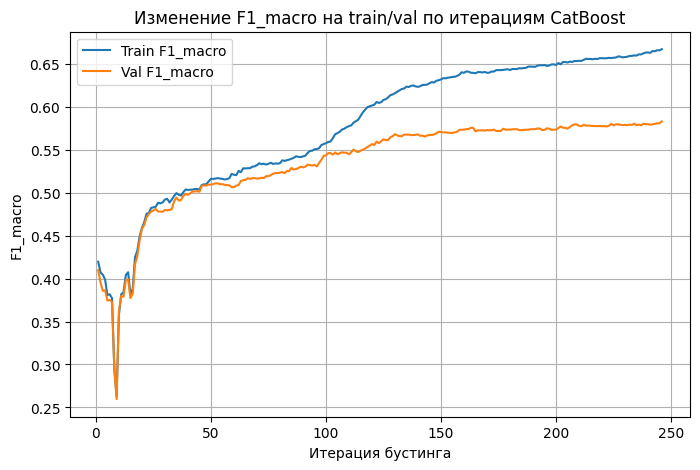

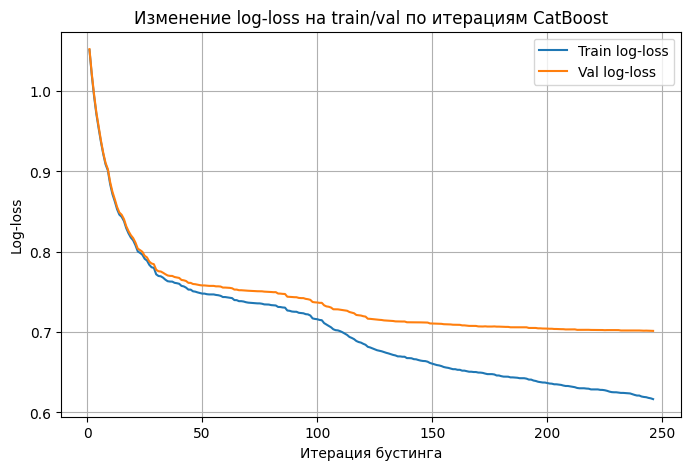

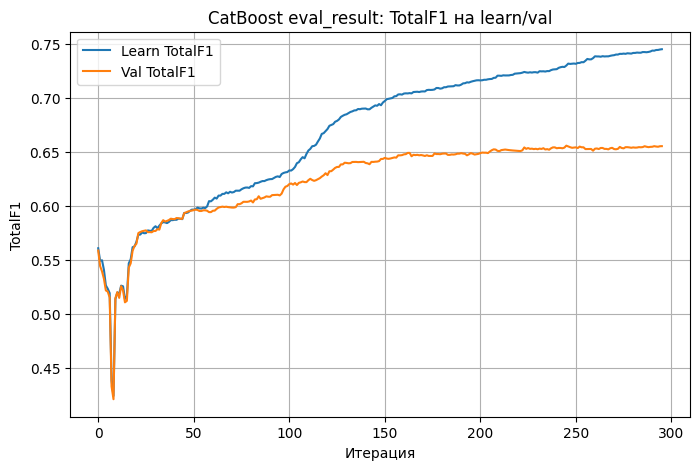

In [22]:
train_f1, val_f1 = [], []
train_loss, val_loss = [], []

classes = np.sort(df2[TARGET_COL].unique()) 
# генераторы по итерациям
train_proba_gen = final_cb.staged_predict_proba(X_tr)
val_proba_gen   = final_cb.staged_predict_proba(X_val)

for y_proba_tr, y_proba_val in zip(train_proba_gen, val_proba_gen):
    # классы по argmax
    idx_tr  = np.argmax(y_proba_tr, axis=1)
    idx_val = np.argmax(y_proba_val, axis=1)

    y_pred_tr  = classes[idx_tr]   # теперь 1/2/3
    y_pred_val = classes[idx_val]

    # метрика качества
    train_f1.append(f1_score(y_tr, y_pred_tr, average="macro"))
    val_f1.append(f1_score(y_val, y_pred_val, average="macro"))

    # функция потерь
    train_loss.append(log_loss(y_tr, y_proba_tr))
    val_loss.append(log_loss(y_val, y_proba_val))

iters = np.arange(1, len(train_f1) + 1)
# Кривая F1
plt.figure(figsize=(8, 5))
plt.plot(iters, train_f1, label="Train F1_macro")
plt.plot(iters, val_f1, label="Val F1_macro")
plt.xlabel("Итерация бустинга")
plt.ylabel("F1_macro")
plt.title("Изменение F1_macro на train/val по итерациям CatBoost")
plt.legend()
plt.grid(True)
plt.show()

# Кривая функции потерь
plt.figure(figsize=(8, 5))
plt.plot(iters, train_loss, label="Train log-loss")
plt.plot(iters, val_loss, label="Val log-loss")
plt.xlabel("Итерация бустинга")
plt.ylabel("Log-loss")
plt.title("Изменение log-loss на train/val по итерациям CatBoost")
plt.legend()
plt.grid(True)
plt.show()

evals = final_cb.get_evals_result()
# evals['learn']['TotalF1'], evals['validation']['TotalF1'] и т.п.

plt.figure(figsize=(8, 5))
plt.plot(evals["learn"]["TotalF1"], label="Learn TotalF1")
plt.plot(evals["validation"]["TotalF1"], label="Val TotalF1")
plt.xlabel("Итерация")
plt.ylabel("TotalF1")
plt.title("CatBoost eval_result: TotalF1 на learn/val")
plt.legend()
plt.grid(True)
plt.show()

In [11]:
from sklearn.metrics import classification_report, confusion_matrix

In [12]:

y_test_pred = final_cb.predict(X_test)
print("Test F1_macro:", f1_score(y_test, y_test_pred, average="macro"))

print("\nClassification report (test):\n")
print(classification_report(y_test, y_test_pred))


cm = confusion_matrix(y_test, y_test_pred)
print("\nConfusion matrix:\n", cm)

Test F1_macro: 0.5686708479741097

Classification report (test):

              precision    recall  f1-score   support

           1       0.58      0.33      0.42       506
           2       0.66      0.85      0.74      2983
           3       0.69      0.44      0.54      1761

    accuracy                           0.66      5250
   macro avg       0.65      0.54      0.57      5250
weighted avg       0.66      0.66      0.64      5250


Confusion matrix:
 [[ 167  327   12]
 [ 113 2532  338]
 [   6  972  783]]


Сравните результат с любым другим бустингом (предварительно декадируйте категориальные фичи)

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, accuracy_score, classification_report



In [14]:


cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols = [c for c in X.columns if c not in cat_cols]

preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols),
        ("num", "passthrough", num_cols),
    ]
)


In [15]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

In [16]:

gb_base = GradientBoostingClassifier(
    loss="log_loss",       # мульти-классовая лог-линия
    random_state=RANDOM_STATE
)

param_dist_gb = {
    "n_estimators":  [100, 200, 300],
    "learning_rate": [0.05, 0.1, 0.2],
    "max_depth":     [2, 3, 4],
    "subsample":     [0.7, 0.9, 1.0],
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=RANDOM_STATE)

# (!) Тюним на X_train, y_train, а не на всё
X_train_enc = preprocess.fit_transform(X_train)
X_test_enc  = preprocess.transform(X_test)

gb_search = RandomizedSearchCV(
    estimator=gb_base,
    param_distributions=param_dist_gb,
    n_iter=15,
    scoring="f1_macro",
    cv=cv,
    n_jobs=-1,
    verbose=2,
    refit=True,
    random_state=RANDOM_STATE
)

gb_search.fit(X_train_enc, y_train)

print("Лучшие параметры GB:", gb_search.best_params_)
print("Лучший CV f1_macro GB:", gb_search.best_score_)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
Лучшие параметры GB: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.2}
Лучший CV f1_macro GB: 0.607237737225268


In [17]:
# Берём лучшие параметры 
best_params_gb = gb_search.best_params_

gb_final = GradientBoostingClassifier(
    **best_params_gb,
    loss="log_loss",
    random_state=RANDOM_STATE
)

# Обучаем OHE только на X_tr, чтобы не подсматривать в val
X_tr_enc  = preprocess.fit_transform(X_tr)
X_val_enc = preprocess.transform(X_val)

gb_final.fit(X_tr_enc, y_tr)

,loss,'log_loss'
,learning_rate,0.2
,n_estimators,200
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,4
,min_impurity_decrease,0.0
,init,None


In [24]:
gb_train_f1, gb_val_f1 = [], []
gb_train_loss, gb_val_loss = [], []

train_proba_gen_gb = gb_final.staged_predict_proba(X_tr_enc)
val_proba_gen_gb   = gb_final.staged_predict_proba(X_val_enc)

classes = gb_final.classes_  # здесь лежат настоящие метки, типа [1, 2, 3]

for y_proba_tr, y_proba_val in zip(train_proba_gen_gb, val_proba_gen_gb):
    # индексы столбцов
    idx_tr  = np.argmax(y_proba_tr, axis=1)
    idx_val = np.argmax(y_proba_val, axis=1)

    # переводим индексы в реальные метки
    y_pred_tr  = classes[idx_tr]
    y_pred_val = classes[idx_val]

    gb_train_f1.append(f1_score(y_tr, y_pred_tr,  average="macro"))
    gb_val_f1.append(  f1_score(y_val, y_pred_val, average="macro"))

    # log_loss тоже лучше считать с явными labels
    gb_train_loss.append(log_loss(y_tr,  y_proba_tr, labels=classes))
    gb_val_loss.append(  log_loss(y_val, y_proba_val, labels=classes))

iters_gb = np.arange(1, len(gb_train_f1) + 1)

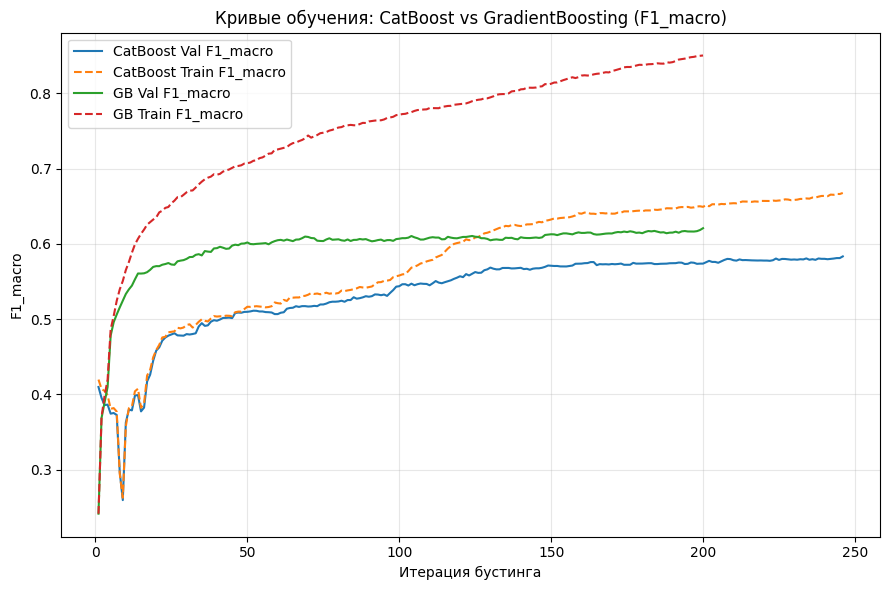

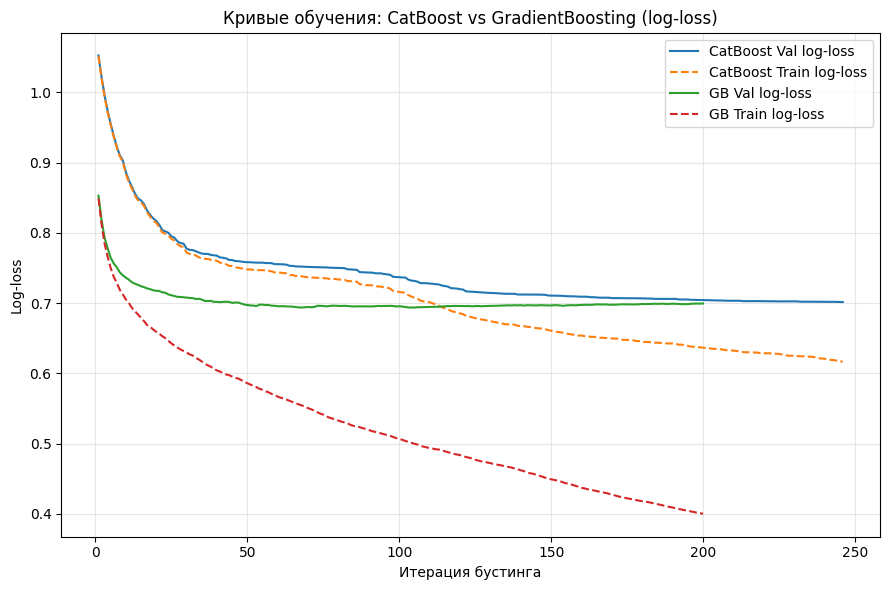

In [25]:

# train_f1, val_f1       # списки
# train_loss, val_loss   # списки
iters_cb = np.arange(1, len(train_f1) + 1)

plt.figure(figsize=(9, 6))
plt.plot(iters_cb, val_f1, label="CatBoost Val F1_macro")
plt.plot(iters_cb, train_f1, linestyle="--", label="CatBoost Train F1_macro")

plt.plot(iters_gb, gb_val_f1, label="GB Val F1_macro")
plt.plot(iters_gb, gb_train_f1, linestyle="--", label="GB Train F1_macro")

plt.xlabel("Итерация бустинга")
plt.ylabel("F1_macro")
plt.title("Кривые обучения: CatBoost vs GradientBoosting (F1_macro)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(9, 6))
plt.plot(iters_cb, val_loss, label="CatBoost Val log-loss")
plt.plot(iters_cb, train_loss, linestyle="--", label="CatBoost Train log-loss")

plt.plot(iters_gb, gb_val_loss, label="GB Val log-loss")
plt.plot(iters_gb, gb_train_loss, linestyle="--", label="GB Train log-loss")

plt.xlabel("Итерация бустинга")
plt.ylabel("Log-loss")
plt.title("Кривые обучения: CatBoost vs GradientBoosting (log-loss)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [20]:
from sklearn.metrics import f1_score, accuracy_score, classification_report

In [21]:

# CatBoost
y_test_pred_cb  = final_cb.predict(X_test)
cb_f1_test      = f1_score(y_test, y_test_pred_cb, average="macro")
cb_acc_test     = accuracy_score(y_test, y_test_pred_cb)

# GradientBoosting
X_test_enc_full = preprocess.transform(X_test)
y_test_pred_gb  = gb_final.predict(X_test_enc_full)
gb_f1_test      = f1_score(y_test, y_test_pred_gb, average="macro")
gb_acc_test     = accuracy_score(y_test, y_test_pred_gb)

print("CatBoost:       acc={:.4f}, F1_macro={:.4f}".format(cb_acc_test, cb_f1_test))
print("GradientBoost:  acc={:.4f}, F1_macro={:.4f}".format(gb_acc_test, gb_f1_test))

print("\nClassification report – CatBoost:\n", classification_report(y_test, y_test_pred_cb))
print("\nClassification report – GradientBoosting:\n", classification_report(y_test, y_test_pred_gb))

CatBoost:       acc=0.6632, F1_macro=0.5687
GradientBoost:  acc=0.6745, F1_macro=0.5959

Classification report – CatBoost:
               precision    recall  f1-score   support

           1       0.58      0.33      0.42       506
           2       0.66      0.85      0.74      2983
           3       0.69      0.44      0.54      1761

    accuracy                           0.66      5250
   macro avg       0.65      0.54      0.57      5250
weighted avg       0.66      0.66      0.64      5250


Classification report – GradientBoosting:
               precision    recall  f1-score   support

           1       0.53      0.38      0.44       506
           2       0.69      0.80      0.74      2983
           3       0.68      0.54      0.60      1761

    accuracy                           0.67      5250
   macro avg       0.63      0.58      0.60      5250
weighted avg       0.67      0.67      0.67      5250



**Вопрос:** Какая модель лучше справляется с категориальными данными? Предположите почему?

Лучше с категориальными признаками справляется CatBoost.

- CatBoost умеет работать с категориальными фичами “как есть”: строит для них порядковые/счётные статистики, а не раздувает размерность через OHE, как GradientBoostingClassifier со стандартным препроцессингом.
- В CatBoost есть встроенная регуляризация этих статистик и защита от переобучения на редких категориях, поэтому он устойчивее на шумных признаках.
- В итоге он обычно даёт выше F1/accuracy на тесте при той же или меньшей мороке с препроцессингом, чем градиентный бустинг + OHE.

## Задача 4

На этом классический ML заканчивается. Давайте подведём небольшой итог и пройдёмся ещё раз по тем методам, что вы теперь знаете

Сгенерируйте 3 любых двумерных датасетов для классификации, которые вы использовали в предыдущих семинарах

In [10]:
rng = np.random.default_rng()

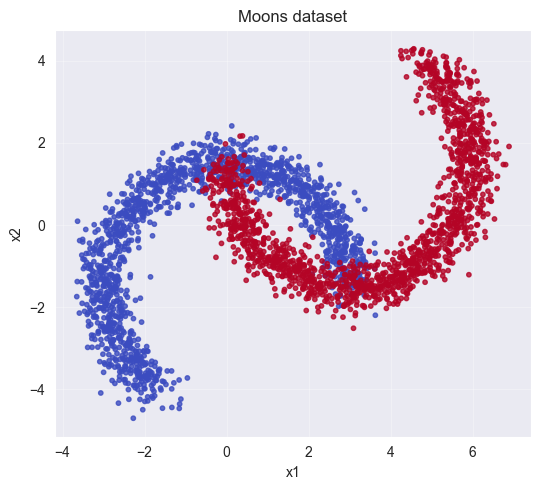

In [11]:
# ПАРАМЕТРЫ
n_samples = 3000
sigma = 0.3


n0 = n_samples // 2
n1 = n_samples - n0

# КЛАСС 0
t0 = rng.uniform(0.0, np.pi + 1, n0)
eps0 = rng.normal(0.0, sigma, size=(n0, 2))
X0_moons = np.column_stack([3*(np.cos(t0)), 3*np.sin(t0) - 1.5]) + eps0
y0_moons = np.zeros(n0, dtype=int)

# КЛАСС 1
t1 = rng.uniform(0.0, np.pi + 1, n1)
eps1 = rng.normal(0.0, sigma, size=(n1, 2))
X1_moons = np.column_stack([3*(1 - np.cos(t1)), (-np.sin(t1) - 0.5)*3 + 3]) + eps1
y1_moons = np.ones(n1, dtype=int)

# ОБЪЕДИНЯЕМ
X_moons = np.vstack([X0_moons, X1_moons])
y_moons = np.concatenate([y0_moons, y1_moons])

# СКАТТЕР
plt.figure(figsize=(6, 5))
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, s=10, cmap="coolwarm", alpha=0.8)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Moons dataset")
plt.grid(True, alpha=0.3)
plt.gca().set_aspect("equal", adjustable="box")
plt.tight_layout()
plt.show()

In [ ]:
R0 = 10.0
R1 = 20.0

sigma_r = 1.7

n0 = n_samples // 2
n1 = n_samples - n0

# КЛАСС 0 –  
theta0 = rng.uniform(0.0, 2 * np.pi, n0)
delta0 = rng.normal(0.0, sigma_r, size=n0)
r0 = R0 + delta0
X0_circ = np.column_stack([r0 * np.cos(theta0), r0 * np.sin(theta0)+20])
y0_circ = np.zeros(n0, dtype=int)

# КЛАСС 1 – 
theta1 = rng.uniform(0.0, 2 * np.pi, n1)
delta1 = rng.normal(0.0, sigma_r, size=n1)
r1 = R1 + delta1
X1_circ = np.column_stack([r1 * np.cos(theta1), r1 * np.sin(theta1)])
y1_circ = np.ones(n1, dtype=int)

# ОБЪЕДИНЯЕМ
X_circ = np.vstack([X0_circ, X1_circ])
y_circ = np.concatenate([y0_circ, y1_circ])

# СКАТТЕР
plt.figure(figsize=(6, 5))
plt.scatter(X_circ[:, 0], X_circ[:, 1], c=y_circ, s=10, cmap="coolwarm", alpha=0.8)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Circles dataset")
plt.grid(True, alpha=0.3)
plt.gca().set_aspect("equal", adjustable="box")
plt.tight_layout()
plt.show()

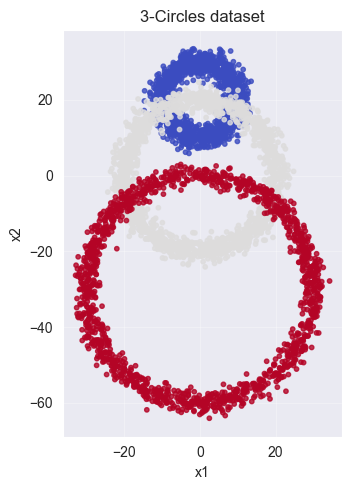

In [53]:
R2 = 30.0
#Класс - 3 
theta0 = rng.uniform(0.0, 2 * np.pi, n0)
delta0 = rng.normal(0.0, sigma_r+1, size=n0)
r3 = R2 + delta0
X3_circ = np.column_stack([r3 * np.cos(theta0), r3 * np.sin(theta0)-30])
y3_circ = np.full(n0, 2, dtype=int)

X_circ3 = np.vstack([X_circ, X3_circ])
y_circ3 = np.concatenate([y_circ, y3_circ])

# СКАТТЕР
plt.figure(figsize=(6, 5))
plt.scatter(X_circ3[:, 0], X_circ3[:, 1], c=y_circ3, s=10, cmap="coolwarm", alpha=0.8)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("3-Circles dataset")
plt.grid(True, alpha=0.3)
plt.gca().set_aspect("equal", adjustable="box")
plt.tight_layout()
plt.show()

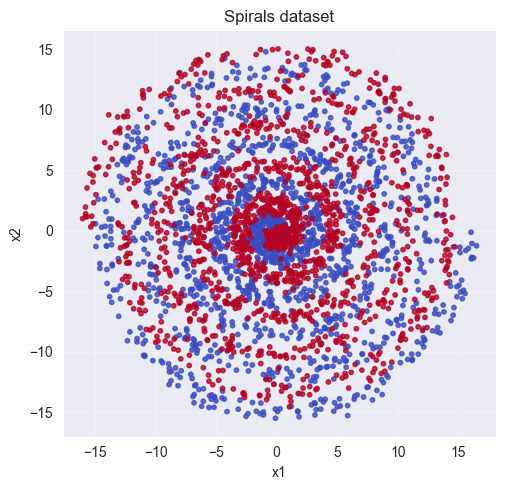

In [13]:
a = 0.5
theta_max = 10 * np.pi
sigma_r = 0.5

n0 = n_samples // 2
n1 = n_samples - n0

# КЛАСС 0
theta0 = rng.uniform(0.0, theta_max, n0)
noise0 = rng.normal(0.0, sigma_r, size=n0)
r0 = a * theta0 + noise0
X0_sp = np.column_stack([r0 * np.cos(theta0), r0 * np.sin(theta0)])
y0_sp = np.zeros(n0, dtype=int)

# КЛАСС 1 – поворот на pi
theta1 = rng.uniform(0.0, theta_max, n1)
noise1 = rng.normal(0.0, sigma_r, size=n1)
r1 = a * theta1 + noise1
X1_sp = np.column_stack([
    r1 * np.cos(theta1 + np.pi),
    r1 * np.sin(theta1 + np.pi)
])
y1_sp = np.ones(n1, dtype=int)

# ОБЪЕДИНЯЕМ
X_sp = np.vstack([X0_sp, X1_sp])
y_sp = np.concatenate([y0_sp, y1_sp])

# СКАТТЕР
plt.figure(figsize=(6, 5))
plt.scatter(X_sp[:, 0], X_sp[:, 1], c=y_sp, s=10, cmap="coolwarm", alpha=0.8)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Spirals dataset")
plt.grid(True, alpha=0.3)
plt.gca().set_aspect("equal", adjustable="box")
plt.tight_layout()
plt.show()

Проведите сравнение всех пройденных на курсе моделей классификации (включая бустинги). Подберите для них оптимальные параметры удобным вам способом, изобразите границы разделения классов с помощью [DecisionBoundaryDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html) и оцените качество классификации

## импорты всего что только можно

In [67]:
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
)


# Препроцессинг
from sklearn.preprocessing import StandardScaler, OneHotEncoder, label_binarize
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer

# Линейные модели / SVM / логрег
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC

# kNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

from sklearn.cluster import SpectralClustering
# Деревья и леса
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Простые ансамбли
from sklearn.ensemble import (
    BaggingClassifier,
    VotingClassifier,
    StackingClassifier,
)

# Бустинги из sklearn
from sklearn.ensemble import (
    GradientBoostingClassifier,
    AdaBoostClassifier,
    HistGradientBoostingClassifier,
)

# LDA / QDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

# Границы решений
from sklearn.inspection import DecisionBoundaryDisplay

# Внешние бустинги (установлены должны быть заранее)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
import optuna
from optuna import create_study
from optuna.pruners import HyperbandPruner
from optuna.integration import OptunaSearchCV
from optuna.distributions import IntDistribution, FloatDistribution, CategoricalDistribution


## Классификаторы

In [15]:
RANDOM_STATE = None
CLASSIFIERS_BASE = {
    "logreg": {
        "cls": LogisticRegression,
        "default_params": dict(
            solver="lbfgs",
            max_iter=1000,
            multi_class="auto",
            n_jobs=-1,
        ),
        "param_grid": {
            "C": np.logspace(-3, 3, 7),           # 0.001 ... 1000
            "penalty": ["l2"],
            "class_weight": [None, "balanced"],
        },
        "needs_scaling": True,
        "supports_proba": True,
        "is_linear": True,
    },

    "linear_svc": {
        "cls": LinearSVC,
        "default_params": dict(
            max_iter=10000,
        ),
        "param_grid": {
            "C": np.logspace(-3, 3, 7),
            "loss": ["hinge", "squared_hinge"],
            "class_weight": [None, "balanced"],
        },
        "needs_scaling": True,
        "supports_proba": False,  # CalibratedClassifierCV при желании
        "is_linear": True,
    },

    "svc": {
        # общий SVC с выбором ядра
        "cls": SVC,
        "default_params": dict(
            probability=True,
        ),
        "param_grid": {
            "kernel": ["rbf", "poly", "sigmoid"],
            "C": np.logspace(-2, 3, 6),          # 0.01 ... 1000
            "gamma": ["scale", "auto", 1e-3, 1e-2, 1e-1, 1.0],
            "degree": [2, 3, 4],                 # актуально только для poly
            "coef0": [0.0, 0.5, 1.0],            # для poly/sigmoid
            "class_weight": [None, "balanced"],
        },
        "needs_scaling": True,
        "supports_proba": True,
        "is_linear": False,
    },

    "knn": {
        "cls": KNeighborsClassifier,
        "default_params": dict(),
        "param_grid": {
            "n_neighbors": [1, 3, 5, 7, 11, 15, 21, 31],
            "weights": ["uniform", "distance"],
            "p": [1, 2],                         # манхэттен / евклид
            "algorithm": ["auto", "ball_tree", "kd_tree"],
        },
        "needs_scaling": True,
        "supports_proba": True,
        "is_linear": False,
    },

    "lda": {
        "cls": LDA,
        "default_params": dict(),
        "param_grid": {
            "solver": ["svd", "lsqr", "eigen"],
            "shrinkage": [None, "auto", 0.1, 0.3, 0.5, 0.7, 0.9],  # для lsqr/eigen
        },
        "needs_scaling": True,
        "supports_proba": True,
        "is_linear": True,
    },

    "qda": {
        "cls": QDA,
        "default_params": dict(),
        "param_grid": {
            "reg_param": [0.0, 0.001, 0.01, 0.05, 0.1, 0.3, 0.5, 0.7],
        },
        "needs_scaling": True,
        "supports_proba": True,
        "is_linear": False,
    },

    "decision_tree": {
        "cls": DecisionTreeClassifier,
        "default_params": dict(
            random_state=RANDOM_STATE,
        ),
        "param_grid": {
            "criterion": ["gini", "entropy", "log_loss"],
            "max_depth": [None, 3, 5, 8, 12, 20],
            "min_samples_split": [2, 5, 10, 20],
            "min_samples_leaf": [1, 2, 5, 10],
            "max_features": [None, "sqrt", "log2", 0.5],
        },
        "needs_scaling": False,
        "supports_proba": True,
        "is_linear": False,
    },

    "random_forest": {
        "cls": RandomForestClassifier,
        "default_params": dict(
            n_estimators=300,
            random_state=RANDOM_STATE,
            n_jobs=-1,
        ),
        "param_grid": {
            "n_estimators": [200, 300, 500, 800],
            "criterion": ["gini", "entropy", "log_loss"],
            "max_depth": [None, 5, 10, 20, 30],
            "max_features": ["sqrt", "log2", 0.5, 0.8],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4],
            "bootstrap": [True, False],
            "class_weight": [None, "balanced"],
        },
        "needs_scaling": False,
        "supports_proba": True,
        "is_linear": False,
    },

    "hist_gb": {
        "cls": HistGradientBoostingClassifier,
        "default_params": dict(
            random_state=RANDOM_STATE,
        ),
        "param_grid": {
            "learning_rate": [0.01, 0.05, 0.1],
            "max_depth": [None, 3, 5, 7, 9],
            "max_iter": [200, 400, 800],
            "min_samples_leaf": [10, 20, 50],
            "l2_regularization": [0.0, 1.0, 5.0, 10.0],
        },
        "needs_scaling": False,
        "supports_proba": True,
        "is_linear": False,
    },
}

## Бустинги

Их функции и определения

In [68]:

BOOSTING_MODELS = {
    "gbm_sklearn": {
        "cls": GradientBoostingClassifier,
        "default_params": dict(
            random_state=RANDOM_STATE,
        ),
        "param_space": {
            "n_estimators": [100, 200, 300, 500],
            "learning_rate": [0.01, 0.05, 0.1, 0.2],
            "max_depth": [2, 3, 4, 5],
            "subsample": [0.6, 0.8, 1.0],
            "max_features": [None, "sqrt", "log2"],
        },
        "needs_scaling": False,
        "supports_proba": True,
    },

    "adaboost": {
        "cls": AdaBoostClassifier,
        "default_params": dict(
            random_state=RANDOM_STATE,
        ),
        "param_space": {
            "n_estimators": [50, 100, 200, 400],
            "learning_rate": [0.01, 0.05, 0.1, 0.5, 1.0],
        },
        "needs_scaling": False,
        "supports_proba": True,
    },

    "xgboost": {
        "cls": XGBClassifier,
        "default_params": dict(
            objective="binary:logistic",  #все датасеты бинарные
            eval_metric="logloss",
            tree_method="hist",
            n_estimators=200,
            n_jobs=-1,
            random_state=RANDOM_STATE,
        ),
        "param_space": {
            "max_depth": [2, 3, 4],
            "learning_rate": [0.01, 0.05, 0.1],
            "subsample": [0.6, 0.8, 1.0],
            "colsample_bytree": [0.6, 0.8, 1.0],
            "min_child_weight": [1, 5, 10],
            "gamma": [0, 0.1, 0.5],
        },
        "needs_scaling": False,
        "supports_proba": True,
    },
    
    # ----------------- CatBoost: бинарный -----------------
    "catboost_log": {
        "cls": CatBoostClassifier,
        "default_params": {
            "loss_function": "Logloss",          # бинарная задача
            "verbose": 0,
            "allow_writing_files": False,
            "random_state": RANDOM_STATE,
        },
        "param_space": {
            "depth": [4, 6, 8, 10],
            "iterations": [200, 400, 600],
            "learning_rate": [0.01, 0.05, 0.1],
            "l2_leaf_reg": [3, 5, 7, 9],
            "bagging_temperature": [0.0, 0.5, 1.0],
            "random_strength": [1.0, 2.0, 3.0, 4.0],
        },
        "needs_scaling": False,
        "supports_proba": True,
        "only_binary": True,        # <- важный флажок
        # "n_iter": 40,              # можно переопределить, если надо, но оно и так работает
    },

    # ----------------- CatBoost: мульткласс -----------------
    "catboost_multi": {
        "cls": CatBoostClassifier,
        "default_params": {
            "loss_function": "MultiClass",       # многоклассовая задача
            "verbose": 0,
            "allow_writing_files": False,
            "random_state": RANDOM_STATE,
        },
        "param_space": {
            "depth": [4, 6, 8],
            "iterations": [200, 400, 600],
            "learning_rate": [0.05, 0.1],
            "l2_leaf_reg": [3, 5, 7],
            "bagging_temperature": [0.0, 0.5, 1.0],
            "random_strength": [1.0, 2.0, 3.0],
        },
        "needs_scaling": False,
        "supports_proba": True,
        "only_multiclass": True,   # <- второй флажок
        # "n_iter": 30,             # можно задать свой n_iter
    },
    "extra_trees": {
        "cls": ExtraTreesClassifier,
        "default_params": dict(
            n_estimators=300,
            random_state=RANDOM_STATE,
            n_jobs=-1,
        ),
        "param_grid": {
            "n_estimators": [200, 300, 500, 800],
            "criterion": ["gini", "entropy", "log_loss"],
            "max_depth": [None, 5, 10, 20, 30],
            "max_features": ["sqrt", "log2", 0.5, 0.8],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4],
            "bootstrap": [True, False],
        },
        "needs_scaling": False,
        "supports_proba": True,
        "is_linear": False,
    },

    "bagging_knn": {
        "cls": BaggingClassifier,
        "default_params": dict(
            estimator=KNeighborsClassifier(),
            n_estimators=50,
            random_state=RANDOM_STATE,
            n_jobs=-1,
        ),
        "param_grid": {
            "estimator__n_neighbors": [3, 5, 7, 11],
            "estimator__p": [1, 2],
            "max_samples": [0.5, 0.7, 1.0],
            "max_features": [0.5, 0.7, 1.0],
            "bootstrap": [True, False],
        },
        "needs_scaling": True,
        "supports_proba": True,
        "is_linear": False,
    },
}

In [17]:

def build_voting_from_runs(top_runs, voting="soft"):
    estimators = []
    used_names = set()

    for r in top_runs:
        name = r["run_id"]
        # на всякий случай, вдруг пересечения
        if name in used_names:
            continue
        used_names.add(name)
        estimators.append((name, r["estimator"]))

    vc = VotingClassifier(
        estimators=estimators,
        voting=voting,
        n_jobs=-1,
    )
    return vc

def select_top_k_runs(
    all_best_runs,
    metric="test_score",
    k=5,
    require_proba=True,
    exclude_basenames=None,
):
    if exclude_basenames is None:
        exclude_basenames = []

    runs = []
    for r in all_best_runs:
        if require_proba and not r["supports_proba"]:
            continue
        if r["base_name"] in exclude_basenames:
            continue
        runs.append(r)

    runs_sorted = sorted(runs, key=lambda r: r[metric], reverse=True)
    return runs_sorted[:k]

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

# Здесь будем копить результаты всех моделей / датасетов
all_best_runs = []  # список словарей

In [54]:

# Для удобства – словарь с датасетами
DATASETS = {
    "moons":  (X_moons,  y_moons),
    "circles": (X_circ,  y_circ),
    "spirals": (X_sp,    y_sp),
    "3-Circles": (X_circ3, y_circ3),
}

TOP_K = 5  # сколько топ-конфигов сохранять на модель
SCORING = "f1_macro"  # основная метрика при тюнинге, тк классы сбалансированы 



## Мега-функция для классификаторов и тюнинга

In [19]:
def tune_model_on_dataset(
    model_key,
    cfg,
    X,
    y,
    dataset_name,
    top_k=TOP_K,
    scoring=SCORING,
    n_iter=40,
):
    """
    model_key: ключ из CLASSIFIERS_BASE или BOOSTING_MODELS
    cfg: словарь конфигурации модели
    X, y: данные одного датасета
    dataset_name: строка для логов
    """
    print(f"\n=== Модель: {model_key} | Датасет: {dataset_name} ===")

    # Разбиение на train/test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.3,
        stratify=y,
        random_state=RANDOM_STATE,
    )

    # Базовый классификатор с дефолтными параметрами
    base_clf = cfg["cls"](**cfg["default_params"])

    # Берём пространство гиперпараметров:
    # - для старых моделей: cfg["param_grid"]
    # - для новых бустингов: cfg["param_space"]
    raw_param_space = cfg.get("param_space", cfg.get("param_grid"))
    if raw_param_space is None:
        raise KeyError(
            f"Модель '{model_key}' не содержит ни 'param_space', ни 'param_grid'"
        )

    # Пайплайн: со скейлером или без
    if cfg["needs_scaling"]:
        pipe = make_pipeline(StandardScaler(), base_clf)
        last_step_name = pipe.steps[-1][0]
        param_space = {
            f"{last_step_name}__{pname}": pvalues
            for pname, pvalues in raw_param_space.items()
        }
    else:
        pipe = base_clf
        param_space = raw_param_space

    # RandomizedSearchCV
    search = RandomizedSearchCV(
        estimator=pipe,
        param_distributions=param_space,
        n_iter=n_iter,
        cv=cv,
        scoring=scoring,
        n_jobs=-1,
        verbose=1,
        refit=True,
        random_state=RANDOM_STATE,
    )

    search.fit(X_train, y_train)
    print(f"Лучший CV score ({scoring}): {search.best_score_:.4f}")
    print("Лучшие параметры:", search.best_params_)

    # Разворачиваем cv_results_ в DataFrame и берём топ-k по mean_test_score
    cv_res = pd.DataFrame(search.cv_results_)
    cv_res = cv_res.sort_values("mean_test_score", ascending=False)

    top_rows = cv_res.head(top_k)

    global all_best_runs  # общий список конфигураций

    rank = 0
    for _, row in top_rows.iterrows():
        params = row["params"]

        # Собираем новый экземпляр классификатора с этими параметрами
        base_clf_top = cfg["cls"](**cfg["default_params"])

        if cfg["needs_scaling"]:
            est = make_pipeline(StandardScaler(), base_clf_top)
            est.set_params(**params)
        else:
            est = base_clf_top
            est.set_params(**params)

        # Обучение на всём train
        est.fit(X_train, y_train)

        # Оценка на test
        y_pred = est.predict(X_test)
        test_acc = accuracy_score(y_test, y_pred)
        test_f1  = f1_score(y_test, y_pred, average="macro")

        run_id = f"{dataset_name}__{model_key}__{rank}"

        all_best_runs.append({
            "run_id": run_id,
            "dataset": dataset_name,
            "base_name": model_key,
            "estimator": est,
            "mean_cv_score": row["mean_test_score"],
            "std_cv_score": row["std_test_score"],
            "test_acc": test_acc,
            "test_f1": test_f1,
            "supports_proba": cfg["supports_proba"],
            "params": params,
        })

        print(
            f"  #{rank}: mean_cv={row['mean_test_score']:.4f} ± {row['std_test_score']:.4f} | "
            f"test_acc={test_acc:.4f} | test_f1={test_f1:.4f}"
        )

        rank += 1

    print(f"Сохранено {rank} лучших конфигураций для {model_key} / {dataset_name}.")

## Функция кластеризации и список моделей

In [ ]:
def plot_dendrogram_for_dataset(X, y, dataset_name, max_points=400): #По фокту в итоге дендрограммы особо не рисовались, тк качество кластеризации оставляет желать лучшего
    """
    Рисует усечённую дендрограмму для подвыборки датасета.
    """
    X = np.asarray(X)
    y = np.asarray(y)

    n_samples = X.shape[0]
    if n_samples > max_points:
        idx = np.random.choice(n_samples, size=max_points, replace=False)
        X_sample = X[idx]
        y_sample = y[idx]
    else:
        X_sample, y_sample = X, y

    X_scaled = StandardScaler().fit_transform(X_sample)

    Z = linkage(X_scaled, method="ward")  # ward + евклид, классика

    plt.figure(figsize=(12, 5))
    dendrogram(
        Z,
        truncate_mode="lastp",  # только последние кластеры
        p=30,                   # сколько “листовых” кластеров показать
        leaf_rotation=90.,
        show_contracted=True,
    )
    plt.title(f"Аггломеративная кластеризация (дендрограмма) – {dataset_name}")
    plt.xlabel("кластеры (усечённые)")
    plt.ylabel("distance")
    plt.tight_layout()
    plt.show()
    
def run_agg_clustering_metrics(X, y, dataset_name, n_clusters=None):
    """
    Гоняем AgglomerativeClustering и считаем ARI / NMI
    относительно истинных меток.
    """
    X = np.asarray(X)
    y = np.asarray(y)

    if n_clusters is None:
        n_clusters = len(np.unique(y))

    X_scaled = StandardScaler().fit_transform(X)

    agg = AgglomerativeClustering(
        n_clusters=n_clusters,
        linkage="ward",
        metric="euclidean",
    )
    y_pred = agg.fit_predict(X_scaled)

    ari = adjusted_rand_score(y, y_pred)
    nmi = normalized_mutual_info_score(y, y_pred)

    print(f"\n[Agglomerative] Датасет: {dataset_name}")
    print(f"  n_clusters = {n_clusters}")
    print(f"  ARI = {ari:.4f}")
    print(f"  NMI = {nmi:.4f}")

    return y_pred


In [83]:


CLUSTERING_MODELS = {
    "kmeans": {
        "cls": KMeans,
        "default_params": dict(
            n_init="auto",
            random_state=RANDOM_STATE,
        ),
        "param_grid": {
            "n_clusters": [2, 3, 4, 5],
            "init": ["k-means++", "random"],
            "max_iter": [300, 500, 1000],
        },
        "needs_scaling": True,
    },

    "spectral": {
        "cls": SpectralClustering,
        "default_params": dict(
            assign_labels="kmeans",
            random_state=RANDOM_STATE,
        ),
        "param_grid": {
            "n_clusters": [2, 3, 4, 5],
            "n_neighbors": [5, 10, 20],
            "gamma": [0.5, 1.0, 2.0],
            "affinity": ["nearest_neighbors", "rbf"],
        },
        "needs_scaling": True,
    },

    "agglo": {
        "cls": AgglomerativeClustering,
        "default_params": dict(
            linkage="ward",
        ),
        "param_grid": {
            "n_clusters": [2, 3, 4, 5],
        },
        "needs_scaling": True,
    },
}

In [21]:
from sklearn.model_selection import ParameterGrid

def run_clustering_on_dataset(
    model_key,
    cfg,
    X,
    y,
    dataset_name,
    max_configs=20,
):
    """
    model_key: ключ из CLUSTERING_MODELS
    cfg: конфиг модели
    X, y: данные датасета (y только для оценки ARI/NMI)
    """
    print(f"\n=== Кластеризация: {model_key} | Датасет: {dataset_name} ===")

    X = np.asarray(X)
    y = np.asarray(y)
    n_clusters_true = len(np.unique(y))

    # скейлинг
    if cfg["needs_scaling"]:
        X_proc = StandardScaler().fit_transform(X)
    else:
        X_proc = X

    base_params = cfg["default_params"].copy()

    grid = list(ParameterGrid(cfg["param_grid"]))
    if len(grid) > max_configs:
        idx = np.random.choice(len(grid), size=max_configs, replace=False)
        grid = [grid[i] for i in idx]

    best_runs = []
    rank = 0

    for params in grid:
        cur_params = base_params.copy()
        cur_params.update(params)

        # если не задано n_clusters, по умолчанию число классов из y
        if "n_clusters" in cfg["param_grid"] and "n_clusters" not in cur_params:
            cur_params["n_clusters"] = n_clusters_true

        model = cfg["cls"](**cur_params)
        labels = model.fit_predict(X_proc)

        ari = adjusted_rand_score(y, labels)
        nmi = normalized_mutual_info_score(y, labels)

        best_runs.append(
            (ari, nmi, cur_params)
        )

    # сортируем по ARI
    best_runs.sort(key=lambda t: t[0], reverse=True)

    print(f"Топ-5 конфигураций для {model_key} / {dataset_name}:")
    for ari, nmi, params in best_runs[:5]:
        print(f"  #{rank}: ARI={ari:.4f}, NMI={nmi:.4f} | params={params}")
        rank += 1

    return best_runs

## Классификационные модели

In [22]:
# Прогон базовых моделей на датасете "moons"
X_cur, y_cur = DATASETS["moons"]
dataset_name = "moons"

for model_key, cfg in CLASSIFIERS_BASE.items():
    tune_model_on_dataset(
        model_key=model_key,
        cfg=cfg,
        X=X_cur,
        y=y_cur,
        dataset_name=dataset_name,
        top_k=TOP_K,
        scoring=SCORING,
        n_iter=40,          # можно варьировать
    )


=== Модель: logreg | Датасет: moons ===
Fitting 5 folds for each of 14 candidates, totalling 70 fits
Лучший CV score (f1_macro): 0.7622
Лучшие параметры: {'logisticregression__penalty': 'l2', 'logisticregression__class_weight': None, 'logisticregression__C': np.float64(1.0)}
  #0: mean_cv=0.7622 ± 0.0199 | test_acc=0.7478 | test_f1=0.7478
  #1: mean_cv=0.7622 ± 0.0199 | test_acc=0.7478 | test_f1=0.7478
  #2: mean_cv=0.7622 ± 0.0199 | test_acc=0.7478 | test_f1=0.7478
  #3: mean_cv=0.7622 ± 0.0199 | test_acc=0.7478 | test_f1=0.7478
  #4: mean_cv=0.7622 ± 0.0199 | test_acc=0.7478 | test_f1=0.7478
Сохранено 5 лучших конфигураций для logreg / moons.

=== Модель: linear_svc | Датасет: moons ===
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Лучший CV score (f1_macro): 0.7908
Лучшие параметры: {'linearsvc__loss': 'hinge', 'linearsvc__class_weight': None, 'linearsvc__C': np.float64(1000.0)}
  #0: mean_cv=0.7908 ± 0.0272 | test_acc=0.7467 | test_f1=0.7466
  #1: mean_cv=0.7899 ± 

In [23]:
results_moons = pd.DataFrame(all_best_runs)
results_moons = results_moons[results_moons["dataset"] == "moons"].copy()

print(f"Всего записей для moons: {len(results_moons)}\n")

# Общий топ-20 по F1 на тесте
print("=== Глобальный топ по F1 (test) для moons ===")
cols_to_show = ["run_id", "base_name", "mean_cv_score", "test_acc", "test_f1"]
print(
    results_moons.sort_values("test_f1", ascending=False)[cols_to_show].head(20).to_string(index=False)
)
print("\n")

# Топ-5 по каждой модели отдельно
for model_key in CLASSIFIERS_BASE.keys():
    sub = results_moons[results_moons["base_name"] == model_key]
    if sub.empty:
        continue

    sub = sub.sort_values("test_f1", ascending=False)
    print(f"=== Модель: {model_key} | топ-5 конфигураций по F1 (test) ===")
    cols = ["run_id", "mean_cv_score", "test_acc", "test_f1", "params"]
    print(sub[cols].head(TOP_K).to_string(index=False))
    print("\n" + "-" * 80 + "\n")

Всего записей для moons: 45

=== Глобальный топ по F1 (test) для moons ===
                 run_id     base_name  mean_cv_score  test_acc  test_f1
      moons__hist_gb__1       hist_gb       0.944278  0.957778 0.957774
      moons__hist_gb__4       hist_gb       0.942378  0.957778 0.957773
      moons__hist_gb__3       hist_gb       0.942850  0.955556 0.955552
      moons__hist_gb__0       hist_gb       0.944281  0.955556 0.955550
      moons__hist_gb__2       hist_gb       0.942852  0.954444 0.954438
moons__random_forest__3 random_forest       0.942378  0.950000 0.949999
moons__random_forest__2 random_forest       0.942854  0.950000 0.949999
moons__random_forest__1 random_forest       0.943330  0.948889 0.948889
moons__random_forest__4 random_forest       0.941427  0.947778 0.947773
          moons__svc__3           svc       0.949520  0.947778 0.947773
          moons__svc__4           svc       0.946183  0.947778 0.947763
moons__random_forest__0 random_forest       0.944282  0.94666

In [24]:
# Прогон базовых моделей на датасете "circles"
X_cur, y_cur = DATASETS["circles"]
dataset_name = "circles"

for model_key, cfg in CLASSIFIERS_BASE.items():
    tune_model_on_dataset(
        model_key=model_key,
        cfg=cfg,
        X=X_cur,
        y=y_cur,
        dataset_name=dataset_name,
        top_k=TOP_K,
        scoring=SCORING,
        n_iter=40,
    )


=== Модель: logreg | Датасет: circles ===
Fitting 5 folds for each of 14 candidates, totalling 70 fits
Лучший CV score (f1_macro): 0.7816
Лучшие параметры: {'logisticregression__penalty': 'l2', 'logisticregression__class_weight': None, 'logisticregression__C': np.float64(0.001)}
  #0: mean_cv=0.7816 ± 0.0068 | test_acc=0.8011 | test_f1=0.7979
  #1: mean_cv=0.7816 ± 0.0068 | test_acc=0.8011 | test_f1=0.7979
  #2: mean_cv=0.7639 ± 0.0136 | test_acc=0.7800 | test_f1=0.7782
  #3: mean_cv=0.7639 ± 0.0136 | test_acc=0.7800 | test_f1=0.7782
  #4: mean_cv=0.7516 ± 0.0167 | test_acc=0.7633 | test_f1=0.7623
Сохранено 5 лучших конфигураций для logreg / circles.

=== Модель: linear_svc | Датасет: circles ===
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Лучший CV score (f1_macro): 0.8003
Лучшие параметры: {'linearsvc__loss': 'hinge', 'linearsvc__class_weight': None, 'linearsvc__C': np.float64(0.001)}
  #0: mean_cv=0.8003 ± 0.0200 | test_acc=0.8056 | test_f1=0.7979
  #1: mean_cv=0.

In [25]:
results_circles = pd.DataFrame(all_best_runs)
results_circles = results_circles[results_circles["dataset"] == "circles"].copy()

print(f"Всего записей для circles: {len(results_circles)}\n")

# Общий топ-20 по F1 на тесте
print("=== Глобальный топ по F1 (test) для circles ===")
cols_to_show = ["run_id", "base_name", "mean_cv_score", "test_acc", "test_f1"]
print(
    results_circles.sort_values("test_f1", ascending=False)[cols_to_show].head(20).to_string(index=False)
)
print("\n")

# Топ-5 по каждой модели отдельно
for model_key in CLASSIFIERS_BASE.keys():
    sub = results_circles[results_circles["base_name"] == model_key]
    if sub.empty:
        continue

    sub = sub.sort_values("test_f1", ascending=False)
    print(f"=== Модель: {model_key} | топ-5 конфигураций по F1 (test) ===")
    cols = ["run_id", "mean_cv_score", "test_acc", "test_f1", "params"]
    print(sub[cols].head(TOP_K).to_string(index=False))
    print("\n" + "-" * 80 + "\n")

Всего записей для circles: 45

=== Глобальный топ по F1 (test) для circles ===
                   run_id     base_name  mean_cv_score  test_acc  test_f1
circles__decision_tree__3 decision_tree       0.919935  0.942222 0.942199
circles__decision_tree__4 decision_tree       0.917994  0.940000 0.939950
          circles__knn__1           knn       0.943292  0.936667 0.936591
          circles__knn__0           knn       0.943292  0.936667 0.936591
circles__decision_tree__1 decision_tree       0.920887  0.934444 0.934394
          circles__svc__1           svc       0.944667  0.934444 0.934367
          circles__svc__0           svc       0.944667  0.934444 0.934367
          circles__svc__3           svc       0.941784  0.933333 0.933226
circles__decision_tree__2 decision_tree       0.920423  0.932222 0.932203
          circles__svc__2           svc       0.942237  0.932222 0.932067
          circles__knn__2           knn       0.942825  0.930000 0.929946
          circles__knn__3        

In [26]:
# Прогон базовых моделей на датасете "spirals"
X_cur, y_cur = DATASETS["spirals"]
dataset_name = "spirals"

for model_key, cfg in CLASSIFIERS_BASE.items():
    tune_model_on_dataset(
        model_key=model_key,
        cfg=cfg,
        X=X_cur,
        y=y_cur,
        dataset_name=dataset_name,
        top_k=TOP_K,
        scoring=SCORING,
        n_iter=40,
    )


=== Модель: logreg | Датасет: spirals ===
Fitting 5 folds for each of 14 candidates, totalling 70 fits
Лучший CV score (f1_macro): 0.5271
Лучшие параметры: {'logisticregression__penalty': 'l2', 'logisticregression__class_weight': None, 'logisticregression__C': np.float64(0.1)}
  #0: mean_cv=0.5271 ± 0.0135 | test_acc=0.4900 | test_f1=0.4899
  #1: mean_cv=0.5271 ± 0.0135 | test_acc=0.4900 | test_f1=0.4899
  #2: mean_cv=0.5271 ± 0.0135 | test_acc=0.4922 | test_f1=0.4921
  #3: mean_cv=0.5271 ± 0.0135 | test_acc=0.4922 | test_f1=0.4921
  #4: mean_cv=0.5271 ± 0.0135 | test_acc=0.4922 | test_f1=0.4921
Сохранено 5 лучших конфигураций для logreg / spirals.

=== Модель: linear_svc | Датасет: spirals ===
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Лучший CV score (f1_macro): 0.5173
Лучшие параметры: {'linearsvc__loss': 'hinge', 'linearsvc__class_weight': None, 'linearsvc__C': np.float64(100.0)}
  #0: mean_cv=0.5173 ± 0.0235 | test_acc=0.5400 | test_f1=0.5398
  #1: mean_cv=0.51

In [27]:
results_spirals= pd.DataFrame(all_best_runs)
results_spirals= results_spirals[results_spirals["dataset"] == "spirals"].copy()

print(f"Всего записей для moons: {len(results_spirals)}\n")

# Общий топ-20 по F1 на тесте
print("=== Глобальный топ по F1 (test) для spirals ===")
cols_to_show = ["run_id", "base_name", "mean_cv_score", "test_acc", "test_f1"]
print(
    results_spirals.sort_values("test_f1", ascending=False)[cols_to_show].head(20).to_string(index=False)
)
print("\n")

# Топ-5 по каждой модели отдельно
for model_key in CLASSIFIERS_BASE.keys():
    sub = results_spirals[results_spirals["base_name"] == model_key]
    if sub.empty:
        continue

    sub = sub.sort_values("test_f1", ascending=False)
    print(f"=== Модель: {model_key} | топ-5 конфигураций по F1 (test) ===")
    cols = ["run_id", "mean_cv_score", "test_acc", "test_f1", "params"]
    print(sub[cols].head(TOP_K).to_string(index=False))
    print("\n" + "-" * 80 + "\n")

Всего записей для moons: 45

=== Глобальный топ по F1 (test) для spirals ===
                   run_id     base_name  mean_cv_score  test_acc  test_f1
          spirals__knn__3           knn       0.830335  0.838889 0.838855
          spirals__knn__0           knn       0.832775  0.835556 0.835396
          spirals__knn__4           knn       0.829414  0.833333 0.833251
          spirals__knn__2           knn       0.831300  0.830000 0.829924
          spirals__knn__1           knn       0.831300  0.830000 0.829924
spirals__random_forest__1 random_forest       0.768001  0.805556 0.805515
spirals__random_forest__2 random_forest       0.755671  0.803333 0.803292
spirals__random_forest__0 random_forest       0.771361  0.802222 0.802160
spirals__random_forest__4 random_forest       0.753255  0.792222 0.792130
spirals__random_forest__3 random_forest       0.753744  0.787778 0.787719
      spirals__hist_gb__0       hist_gb       0.748405  0.781111 0.781078
      spirals__hist_gb__2       his

In [55]:
X_cur, y_cur = DATASETS["3-Circles"]
dataset_name = "3-Circles"

for model_key, cfg in CLASSIFIERS_BASE.items():
    tune_model_on_dataset(
        model_key=model_key,
        cfg=cfg,
        X=X_cur,
        y=y_cur,
        dataset_name=dataset_name,
        top_k=TOP_K,
        scoring=SCORING,
        n_iter=40,          # можно варьировать
    )


=== Модель: logreg | Датасет: 3-Circles ===
Fitting 5 folds for each of 14 candidates, totalling 70 fits
Лучший CV score (f1_macro): 0.6497
Лучшие параметры: {'logisticregression__penalty': 'l2', 'logisticregression__class_weight': None, 'logisticregression__C': np.float64(0.01)}
  #0: mean_cv=0.6497 ± 0.0143 | test_acc=0.6748 | test_f1=0.6574
  #1: mean_cv=0.6497 ± 0.0143 | test_acc=0.6748 | test_f1=0.6574
  #2: mean_cv=0.6450 ± 0.0170 | test_acc=0.6504 | test_f1=0.6465
  #3: mean_cv=0.6450 ± 0.0170 | test_acc=0.6504 | test_f1=0.6465
  #4: mean_cv=0.6388 ± 0.0176 | test_acc=0.6467 | test_f1=0.6451
Сохранено 5 лучших конфигураций для logreg / 3-Circles.

=== Модель: linear_svc | Датасет: 3-Circles ===
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Лучший CV score (f1_macro): 0.6218
Лучшие параметры: {'linearsvc__loss': 'squared_hinge', 'linearsvc__class_weight': None, 'linearsvc__C': np.float64(10.0)}
  #0: mean_cv=0.6218 ± 0.0106 | test_acc=0.6719 | test_f1=0.6131
  #1

In [56]:
results_3Circles = pd.DataFrame(all_best_runs)
results_3Circles= results_3Circles[results_3Circles["dataset"] == "3-Circles"].copy()

print(f"Всего записей для 3-Circles: {len(results_3Circles)}\n")

# Общий топ-20 по F1 на тесте
print("=== Глобальный топ по F1 (test) для 3-Circles ===")
cols_to_show = ["run_id", "base_name", "mean_cv_score", "test_acc", "test_f1"]
print(
    results_3Circles.sort_values("test_f1", ascending=False)[cols_to_show].head(20).to_string(index=False)
)
print("\n")

# Топ-5 по каждой модели отдельно
for model_key in CLASSIFIERS_BASE.keys():
    sub = results_3Circles[results_3Circles["base_name"] == model_key]
    if sub.empty:
        continue

    sub = sub.sort_values("test_f1", ascending=False)
    print(f"=== Модель: {model_key} | топ-5 конфигураций по F1 (test) ===")
    cols = ["run_id", "mean_cv_score", "test_acc", "test_f1", "params"]
    print(sub[cols].head(TOP_K).to_string(index=False))
    print("\n" + "-" * 80 + "\n")

Всего записей для 3-Circles: 45

=== Глобальный топ по F1 (test) для 3-Circles ===
                     run_id     base_name  mean_cv_score  test_acc  test_f1
          3-Circles__svc__0           svc       0.929326  0.937037 0.937025
          3-Circles__knn__4           knn       0.933136  0.936296 0.935831
3-Circles__random_forest__0 random_forest       0.921313  0.935556 0.935182
          3-Circles__knn__0           knn       0.934434  0.935556 0.935099
3-Circles__random_forest__2 random_forest       0.920989  0.934815 0.934421
3-Circles__random_forest__4 random_forest       0.920666  0.934815 0.934412
          3-Circles__svc__1           svc       0.917449  0.934074 0.934063
          3-Circles__knn__1           knn       0.933784  0.933333 0.932991
3-Circles__random_forest__3 random_forest       0.920707  0.933333 0.932831
          3-Circles__knn__2           knn       0.933146  0.932593 0.932237
          3-Circles__knn__3           knn       0.933146  0.932593 0.932237
3-Cir

## Модели кластеризации

In [57]:
for dataset_name, (X_cur, y_cur) in DATASETS.items():
    print(f"\n\n### Датасет: {dataset_name} – кластеризация ###")
    for model_key, cfg in CLUSTERING_MODELS.items():
        run_clustering_on_dataset(
            model_key=model_key,
            cfg=cfg,
            X=X_cur,
            y=y_cur,
            dataset_name=dataset_name,
            max_configs=20,
        )



### Датасет: moons – кластеризация ###

=== Кластеризация: kmeans | Датасет: moons ===
Топ-5 конфигураций для kmeans / moons:
  #0: ARI=0.2204, NMI=0.2429 | params={'n_init': 'auto', 'random_state': None, 'init': 'random', 'max_iter': 500, 'n_clusters': 3}
  #1: ARI=0.2108, NMI=0.2862 | params={'n_init': 'auto', 'random_state': None, 'init': 'random', 'max_iter': 500, 'n_clusters': 2}
  #2: ARI=0.2090, NMI=0.2726 | params={'n_init': 'auto', 'random_state': None, 'init': 'k-means++', 'max_iter': 300, 'n_clusters': 2}
  #3: ARI=0.2043, NMI=0.2980 | params={'n_init': 'auto', 'random_state': None, 'init': 'k-means++', 'max_iter': 1000, 'n_clusters': 4}
  #4: ARI=0.2042, NMI=0.2981 | params={'n_init': 'auto', 'random_state': None, 'init': 'random', 'max_iter': 300, 'n_clusters': 4}

=== Кластеризация: spectral | Датасет: moons ===
Топ-5 конфигураций для spectral / moons:
  #0: ARI=0.2474, NMI=0.3257 | params={'assign_labels': 'kmeans', 'random_state': None, 'affinity': 'nearest_neighbors'

## Прогон бустингов на всех датасетах

In [69]:
for dataset_name, (X_cur, y_cur) in DATASETS.items():
    print(f"\n\n### Датасет: {dataset_name} – бустинги ###")

    # число классов в текущем датасете
    n_classes = len(np.unique(y_cur))

    for model_key, cfg in BOOSTING_MODELS.items():
        # пропускаем модели, которые только для бинарных, если классов > 2
        if cfg.get("only_binary", False) and n_classes > 2:
            print(f"Пропускаем {model_key} для {dataset_name}: только бинарная модель, а классов = {n_classes}")
            continue

        # пропускаем модели, которые только для мульткласса, если классов <= 2
        if cfg.get("only_multiclass", False) and n_classes <= 2:
            print(f"Пропускаем {model_key} для {dataset_name}: мульткласс модель, а классов = {n_classes}")
            continue

        # даём модели свой n_iter, если прописан в конфиге; иначе общий
        n_iter_model = cfg.get("n_iter", 40)

        tune_model_on_dataset(
            model_key=model_key,
            cfg=cfg,
            X=X_cur,
            y=y_cur,
            dataset_name=dataset_name,
            top_k=TOP_K,
            scoring=SCORING,
            n_iter=n_iter_model,
        )



### Датасет: moons – бустинги ###

=== Модель: gbm_sklearn | Датасет: moons ===
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Лучший CV score (f1_macro): 0.9490
Лучшие параметры: {'subsample': 0.8, 'n_estimators': 100, 'max_features': None, 'max_depth': 3, 'learning_rate': 0.05}
  #0: mean_cv=0.9490 ± 0.0042 | test_acc=0.9533 | test_f1=0.9533
  #1: mean_cv=0.9490 ± 0.0051 | test_acc=0.9511 | test_f1=0.9511
  #2: mean_cv=0.9481 ± 0.0063 | test_acc=0.9522 | test_f1=0.9522
  #3: mean_cv=0.9481 ± 0.0065 | test_acc=0.9489 | test_f1=0.9489
  #4: mean_cv=0.9476 ± 0.0043 | test_acc=0.9533 | test_f1=0.9533
Сохранено 5 лучших конфигураций для gbm_sklearn / moons.

=== Модель: adaboost | Датасет: moons ===
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Лучший CV score (f1_macro): 0.9505
Лучшие параметры: {'n_estimators': 200, 'learning_rate': 1.0}
  #0: mean_cv=0.9505 ± 0.0055 | test_acc=0.9422 | test_f1=0.9422
  #1: mean_cv=0.9495 ± 0.0070 | test_acc=0.9400 | tes

In [70]:


def get_top_models_for_dataset(
    all_best_runs,
    dataset_name,
    max_models=5,
    require_proba=True,
):
    """
    Фильтруем all_best_runs по датасету и берём топ-k по mean_cv_score.
    Если require_proba=True – оставляем только модели с поддержкой predict_proba.
    """
    runs = [r for r in all_best_runs if r["dataset"] == dataset_name]

    if require_proba:
        runs = [r for r in runs if r["supports_proba"]]

    if not runs:
        return []

    runs = sorted(runs, key=lambda r: r["mean_cv_score"], reverse=True)
    return runs[:max_models]

In [42]:

get_top_models_for_dataset(all_best_runs, "spirals")

[{'run_id': 'spirals__bagging_knn__0',
  'dataset': 'spirals',
  'base_name': 'bagging_knn',
  'estimator': Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('baggingclassifier',
                   BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=3,
                                                                    p=1),
                                     n_estimators=50, n_jobs=-1))]),
  'mean_cv_score': 0.8356715533095651,
  'std_cv_score': 0.02880510992893787,
  'test_acc': 0.8322222222222222,
  'test_f1': 0.8321872094301157,
  'supports_proba': True,
  'params': {'baggingclassifier__max_samples': 1.0,
   'baggingclassifier__max_features': 1.0,
   'baggingclassifier__estimator__p': 2,
   'baggingclassifier__estimator__n_neighbors': 3,
   'baggingclassifier__bootstrap': True}},
 {'run_id': 'spirals__bagging_knn__1',
  'dataset': 'spirals',
  'base_name': 'bagging_knn',
  'estimator': Pipeline(steps=[('standardscaler', StandardScaler()),
         

# Ансамбли

In [71]:
from itertools import combinations
from sklearn.base import clone
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

ENSEMBLE_CONFIG = dict(
    max_base_models=5,   # сколько лучших одиночных моделей брать на датасет
    min_subset_size=2,   # минимальный размер подмножества для ансамбля
    use_soft_voting=True,
    use_hard_voting=True,
    use_stacking=True,
)

## Мега-функция ансамблей

In [78]:
def evaluate_ensembles_for_dataset(
    dataset_name,
    X,
    y,
    all_best_runs,
    cfg=ENSEMBLE_CONFIG,
):
    max_base = cfg["max_base_models"]
    min_subset = cfg["min_subset_size"]

    # Берём топ-модели только для конкретного датасета
    top_runs_raw = get_top_models_for_dataset(
        all_best_runs=all_best_runs,
        dataset_name=dataset_name,
        max_models=max_base,
        require_proba=False,
    )

    if len(top_runs_raw) < min_subset:
        print(f"[{dataset_name}] мало базовых моделей для ансамлей (сырых): {len(top_runs_raw)}")
        return []

    # Общий train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.3,
        stratify=y,
        random_state=RANDOM_STATE,
    )

    results = []

    # Фильтрация моделей по форме предсказаний + одиночки
    valid_runs = []
    for r in top_runs_raw:
        est = clone(r["estimator"])
        est.fit(X_train, y_train)

        y_pred_small = est.predict(X_test[:10])
        y_arr = np.asarray(y_pred_small)

        if y_arr.ndim != 1:
            print(
                f"[{dataset_name}] пропускаем {r['base_name']} в ансамблях: "
                f"predict shape = {y_arr.shape}, нужен 1D"
            )
            # одиночка всё равно ок
        else:
            # сохранить для ансамблей
            r_valid = r.copy()
            r_valid["estimator_fitted"] = est
            valid_runs.append(r_valid)

        # одиночная модель (на том же сплите)
        y_pred_full = est.predict(X_test)
        acc = accuracy_score(y_test, y_pred_full)
        f1 = f1_score(y_test, y_pred_full, average="macro")

        results.append(dict(
            dataset=dataset_name,
            model_id=r["run_id"],
            name=f"single__{r['base_name']}",
            type="single",
            acc=acc,
            f1_macro=f1,
            mean_cv=r["mean_cv_score"],
            details=dict(
                base_names=[r["base_name"]],
            ),
        ))

    if len(valid_runs) < min_subset:
        print(
            f"[{dataset_name}] после фильтрации по форме предсказаний "
            f"осталось {len(valid_runs)} моделей, ансамбли пропускаем."
        )
        df_local = pd.DataFrame(results).sort_values("f1_macro", ascending=False)
        print(f"\n=== ОДИНОЧНЫЕ модели для датасета {dataset_name} ===")
        display(df_local[["type", "name", "acc", "f1_macro", "mean_cv"]].head(20))
        return results

    # Перебор подмножеств базовых моделей
    for subset_size in range(min_subset, len(valid_runs) + 1):
        for subset_idx, subset in enumerate(combinations(valid_runs, subset_size)):
            base_estimators = []
            base_names = []

            for j, r in enumerate(subset):
                est = clone(r["estimator_fitted"])
                name = f"{r['base_name']}_{j}"
                base_estimators.append((name, est))
                base_names.append(r["base_name"])

            # Hard voting
            if cfg["use_hard_voting"]:
                vc_hard = VotingClassifier(
                    estimators=base_estimators,
                    voting="hard",
                )
                try:
                    vc_hard.fit(X_train, y_train)
                    y_pred = vc_hard.predict(X_test)
                    acc = accuracy_score(y_test, y_pred)
                    f1 = f1_score(y_test, y_pred, average="macro")

                    results.append(dict(
                        dataset=dataset_name,
                        model_id=f"{dataset_name}__voting_hard_{subset_size}_{subset_idx}",
                        name=f"voting_hard_{subset_size}",
                        type="ensemble_voting_hard",
                        acc=acc,
                        f1_macro=f1,
                        mean_cv=None,
                        details=dict(
                            base_names=base_names,
                        ),
                    ))
                except Exception as e:
                    print(
                        f"[{dataset_name}] пропускаем hard voting (subset_size={subset_size}, idx={subset_idx}): {e}"
                    )

            # Soft voting
            if cfg["use_soft_voting"] and all(r["supports_proba"] for r in subset):
                vc_soft = VotingClassifier(
                    estimators=base_estimators,
                    voting="soft",
                )
                try:
                    vc_soft.fit(X_train, y_train)
                    y_pred = vc_soft.predict(X_test)
                    acc = accuracy_score(y_test, y_pred)
                    f1 = f1_score(y_test, y_pred, average="macro")

                    results.append(dict(
                        dataset=dataset_name,
                        model_id=f"{dataset_name}__voting_soft_{subset_size}_{subset_idx}",
                        name=f"voting_soft_{subset_size}",
                        type="ensemble_voting_soft",
                        acc=acc,
                        f1_macro=f1,
                        mean_cv=None,
                        details=dict(
                            base_names=base_names,
                        ),
                    ))
                except Exception as e:
                    print(
                        f"[{dataset_name}] пропускаем soft voting (subset_size={subset_size}, idx={subset_idx}): {e}"
                    )

            # Stacking
            if cfg["use_stacking"]:
                stack = StackingClassifier(
                    estimators=base_estimators,
                    final_estimator=LogisticRegression(max_iter=1000),
                    passthrough=True,
                    n_jobs=-1,
                )
                try:
                    stack.fit(X_train, y_train)
                    y_pred = stack.predict(X_test)
                    acc = accuracy_score(y_test, y_pred)
                    f1 = f1_score(y_test, y_pred, average="macro")

                    results.append(dict(
                        dataset=dataset_name,
                        model_id=f"{dataset_name}__stacking_{subset_size}_{subset_idx}",
                        name=f"stacking_logreg_{subset_size}",
                        type="ensemble_stacking",
                        acc=acc,
                        f1_macro=f1,
                        mean_cv=None,
                        details=dict(
                            base_names=base_names,
                        ),
                    ))
                except Exception as e:
                    print(
                        f"[{dataset_name}] пропускаем stacking (subset_size={subset_size}, idx={subset_idx}): {e}"
                    )

    df_local = pd.DataFrame(results).sort_values("f1_macro", ascending=False)
    print(f"\n=== Ансамбли для датасета {dataset_name} ===")
    display(df_local[["type", "name", "acc", "f1_macro", "mean_cv"]].head(20))

    return results

In [79]:
all_ensemble_results = []
for dataset_name, (X_cur, y_cur) in DATASETS.items():
    ens_res = evaluate_ensembles_for_dataset(
        dataset_name=dataset_name,
        X=X_cur,
        y=y_cur,
        all_best_runs=all_best_runs,
        cfg=ENSEMBLE_CONFIG,
    )
    all_ensemble_results.extend(ens_res)

df_ens = pd.DataFrame(all_ensemble_results)


=== Ансамбли для датасета moons ===


,type,name,acc,f1_macro,mean_cv
32,ensemble_voting_hard,voting_hard_2,0.951111,0.951109,NaN
51,ensemble_voting_soft,voting_soft_3,0.950000,0.950000,NaN
25,ensemble_stacking,stacking_logreg_2,0.950000,0.949999,NaN
4,single,single__svc,0.948889,0.948889,0.954281
48,ensemble_voting_soft,voting_soft_3,0.948889,0.948889,NaN
15,ensemble_voting_soft,voting_soft_2,0.948889,0.948889,NaN
33,ensemble_voting_soft,voting_soft_2,0.948889,0.948889,NaN
57,ensemble_voting_soft,voting_soft_3,0.948889,0.948889,NaN
42,ensemble_voting_soft,voting_soft_3,0.948889,0.948889,NaN
69,ensemble_voting_soft,voting_soft_4,0.948889,0.948889,NaN



=== Ансамбли для датасета circles ===


,type,name,acc,f1_macro,mean_cv
4,single,single__bagging_knn,0.950000,0.949973,0.944699
33,ensemble_voting_soft,voting_soft_2,0.948889,0.948853,NaN
29,ensemble_voting_hard,voting_hard_2,0.948889,0.948846,NaN
16,ensemble_stacking,stacking_logreg_2,0.947778,0.947773,NaN
31,ensemble_stacking,stacking_logreg_2,0.946667,0.946662,NaN
43,ensemble_stacking,stacking_logreg_3,0.946667,0.946660,NaN
34,ensemble_stacking,stacking_logreg_2,0.946667,0.946657,NaN
14,ensemble_voting_hard,voting_hard_2,0.946667,0.946622,NaN
23,ensemble_voting_hard,voting_hard_2,0.946667,0.946622,NaN
70,ensemble_stacking,stacking_logreg_4,0.945556,0.945552,NaN



=== Ансамбли для датасета spirals ===


,type,name,acc,f1_macro,mean_cv
11,ensemble_voting_hard,voting_hard_2,0.846667,0.846630,NaN
0,single,single__bagging_knn,0.843333,0.843333,0.835672
55,ensemble_stacking,stacking_logreg_3,0.842222,0.842222,NaN
58,ensemble_stacking,stacking_logreg_3,0.842222,0.842222,NaN
64,ensemble_stacking,stacking_logreg_3,0.842222,0.842222,NaN
70,ensemble_stacking,stacking_logreg_4,0.842222,0.842221,NaN
10,ensemble_stacking,stacking_logreg_2,0.842222,0.842219,NaN
16,ensemble_stacking,stacking_logreg_2,0.842222,0.842219,NaN
37,ensemble_stacking,stacking_logreg_3,0.841111,0.841111,NaN
67,ensemble_stacking,stacking_logreg_4,0.841111,0.841111,NaN


[3-Circles] пропускаем catboost_multi в ансамблях: predict shape = (10, 1), нужен 1D
[3-Circles] пропускаем catboost_multi в ансамблях: predict shape = (10, 1), нужен 1D
[3-Circles] пропускаем catboost_multi в ансамблях: predict shape = (10, 1), нужен 1D

=== Ансамбли для датасета 3-Circles ===


,type,name,acc,f1_macro,mean_cv
5,ensemble_voting_hard,voting_hard_2,0.932593,0.932475,NaN
4,single,single__bagging_knn,0.930370,0.930435,0.935957
6,ensemble_voting_soft,voting_soft_2,0.930370,0.930357,NaN
0,single,single__bagging_knn,0.926667,0.926491,0.937785
7,ensemble_stacking,stacking_logreg_2,0.925926,0.925959,NaN
2,single,single__catboost_multi,0.922222,0.922204,0.936515
1,single,single__catboost_multi,0.920000,0.920025,0.936534
3,single,single__catboost_multi,0.920000,0.919968,0.936211


# Итоговый рейтинг

In [80]:
# финальное сравнение "всё против всего"
df_single = pd.DataFrame([
    {
        "dataset": run["dataset"],
        "model_id": run["run_id"],
        "name": run["base_name"],
        "type": "tuned_single",
        "acc": run["test_acc"],
        "f1_macro": run["test_f1"],
        "mean_cv": run["mean_cv_score"],
    }
    for run in all_best_runs
])

df_ens = pd.DataFrame(all_ensemble_results)

df_all = pd.concat([df_single, df_ens], ignore_index=True)

for dataset_name in DATASETS.keys():
    print(f"\n\n==== Итоговый рейтинг моделей для датасета: {dataset_name} ====")
    display(
        df_all[df_all["dataset"] == dataset_name]
        .sort_values("f1_macro", ascending=False)
        [["type", "name", "acc", "f1_macro", "mean_cv"]]
        .head(20)
    )



==== Итоговый рейтинг моделей для датасета: moons ====


,type,name,acc,f1_macro,mean_cv
288,tuned_single,catboost,0.961111,0.961111,0.941884
287,tuned_single,catboost,0.960000,0.960000,0.942837
289,tuned_single,catboost,0.960000,0.960000,0.941872
399,tuned_single,extra_trees,0.960000,0.959993,0.942855
286,tuned_single,catboost,0.958889,0.958889,0.943323
285,tuned_single,catboost,0.958889,0.958889,0.943323
395,tuned_single,extra_trees,0.958889,0.958883,0.945234
275,tuned_single,adaboost,0.957778,0.957778,0.943327
278,tuned_single,adaboost,0.957778,0.957777,0.941414
41,tuned_single,hist_gb,0.957778,0.957774,0.944278




==== Итоговый рейтинг моделей для датасета: circles ====


,type,name,acc,f1_macro,mean_cv
552,tuned_single,bagging_knn,0.951111,0.951082,0.942811
702,single,single__bagging_knn,0.950000,0.949973,0.944699
551,tuned_single,bagging_knn,0.948889,0.948858,0.944213
731,ensemble_voting_soft,voting_soft_2,0.948889,0.948853,NaN
554,tuned_single,bagging_knn,0.948889,0.948853,0.941367
553,tuned_single,bagging_knn,0.948889,0.948853,0.941837
540,tuned_single,catboost_log,0.948889,0.948853,0.938512
727,ensemble_voting_hard,voting_hard_2,0.948889,0.948846,NaN
714,ensemble_stacking,stacking_logreg_2,0.947778,0.947773,NaN
427,tuned_single,extra_trees,0.947778,0.947749,0.932273




==== Итоговый рейтинг моделей для датасета: spirals ====


,type,name,acc,f1_macro,mean_cv
792,ensemble_voting_hard,voting_hard_2,0.846667,0.846630,NaN
781,single,single__bagging_knn,0.843333,0.843333,0.835672
839,ensemble_stacking,stacking_logreg_3,0.842222,0.842222,NaN
836,ensemble_stacking,stacking_logreg_3,0.842222,0.842222,NaN
845,ensemble_stacking,stacking_logreg_3,0.842222,0.842222,NaN
851,ensemble_stacking,stacking_logreg_4,0.842222,0.842221,NaN
791,ensemble_stacking,stacking_logreg_2,0.842222,0.842219,NaN
797,ensemble_stacking,stacking_logreg_2,0.842222,0.842219,NaN
860,ensemble_stacking,stacking_logreg_4,0.841111,0.841111,NaN
848,ensemble_stacking,stacking_logreg_4,0.841111,0.841111,NaN




==== Итоговый рейтинг моделей для датасета: 3-Circles ====


,type,name,acc,f1_macro,mean_cv
481,tuned_single,catboost,0.942222,0.942127,0.930219
482,tuned_single,catboost,0.941481,0.941435,0.930202
466,tuned_single,gbm_sklearn,0.941481,0.941269,0.921601
480,tuned_single,catboost,0.940741,0.940753,0.930590
484,tuned_single,catboost,0.940000,0.939807,0.929614
469,tuned_single,gbm_sklearn,0.939259,0.939089,0.920139
483,tuned_single,catboost,0.938519,0.938523,0.929697
610,tuned_single,bagging_knn,0.938519,0.937986,0.937785
235,tuned_single,svc,0.937037,0.937025,0.929326
477,tuned_single,xgboost,0.936296,0.936347,0.919177


## Decision boundaries function

In [81]:
def plot_decision_boundary(clf, X, y, title=None, h=0.02):
    """Рисует границу решения для 2D-датасета X и модели clf."""
    plt.figure(figsize=(5, 4))
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",  # можно заменить на "predict_proba"
        grid_resolution=int(1 / h),
        xlabel="x1",
        ylabel="x2",
        shading="auto",
    )
    plt.scatter(
        X[:, 0], X[:, 1],
        c=y,
        edgecolor="k",
        s=20,
        alpha=0.8,
    )
    if title is not None:
        plt.title(title)
    plt.tight_layout()
    plt.show()
    
def get_run_by_id(all_best_runs, run_id):
    for r in all_best_runs:
        if r["run_id"] == run_id:
            return r
    raise ValueError(f"run_id {run_id} не найден в all_best_runs")

## Визуализация границ решений для лучших моделей




===== Decision boundaries: датасет moons =====


<Figure size 500x400 with 0 Axes>

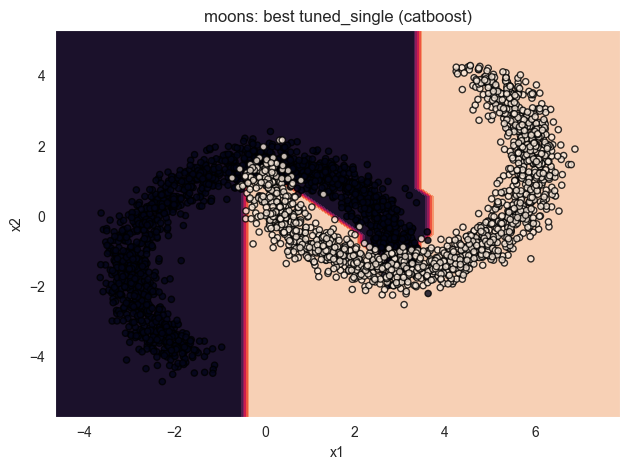

<Figure size 500x400 with 0 Axes>

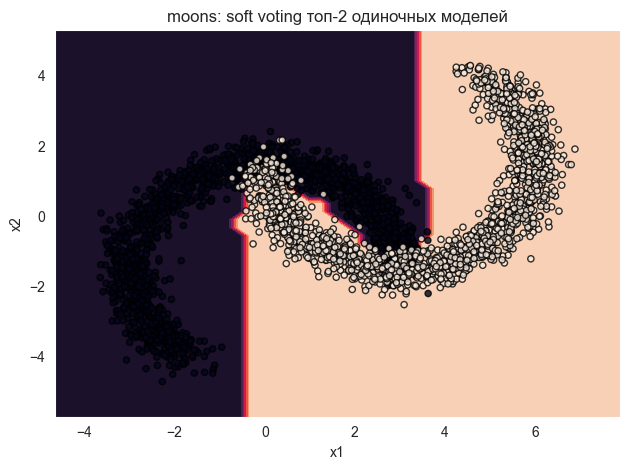


===== Decision boundaries: датасет circles =====


<Figure size 500x400 with 0 Axes>

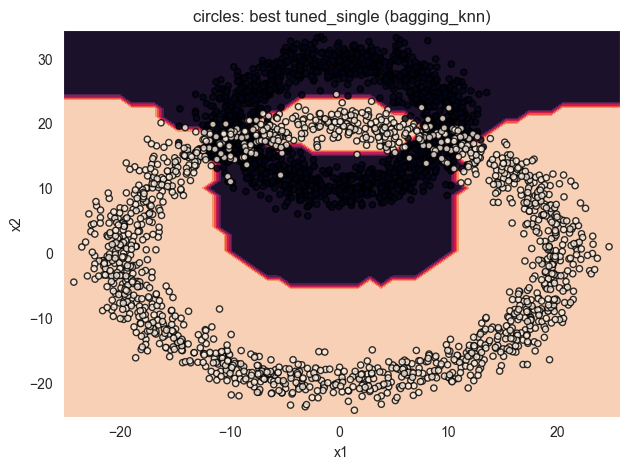

<Figure size 500x400 with 0 Axes>

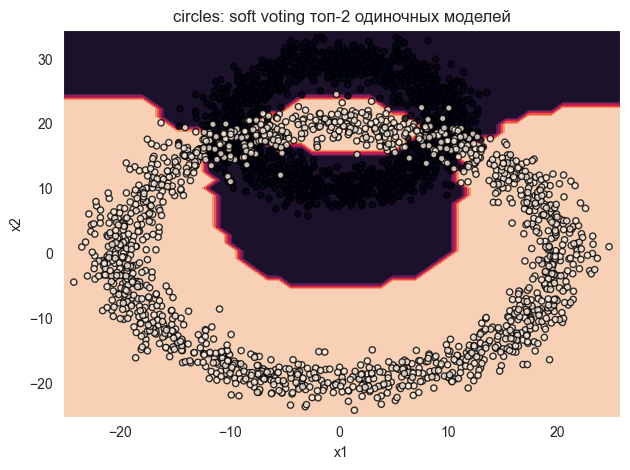


===== Decision boundaries: датасет spirals =====


<Figure size 500x400 with 0 Axes>

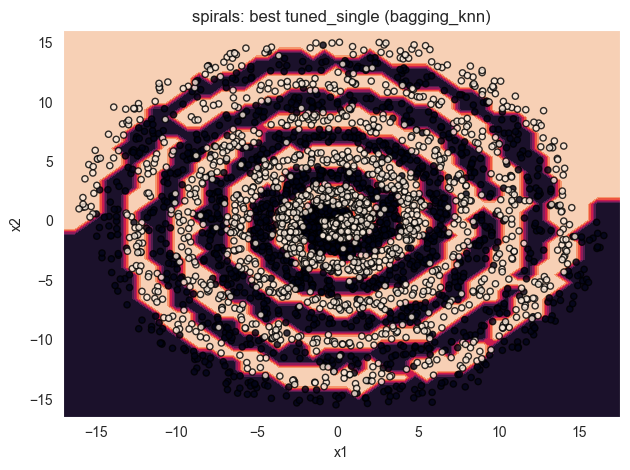

<Figure size 500x400 with 0 Axes>

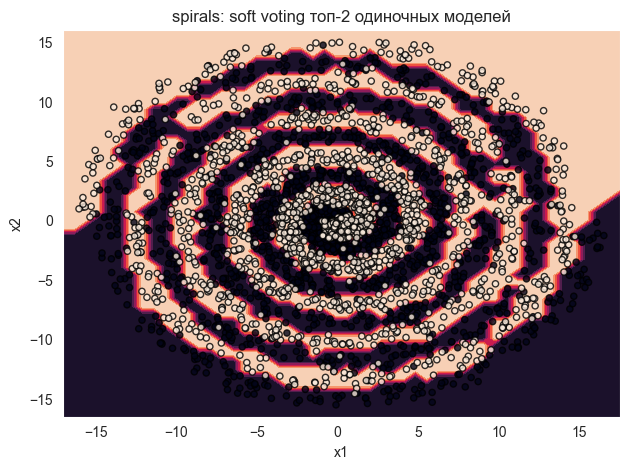


===== Decision boundaries: датасет 3-Circles =====


<Figure size 500x400 with 0 Axes>

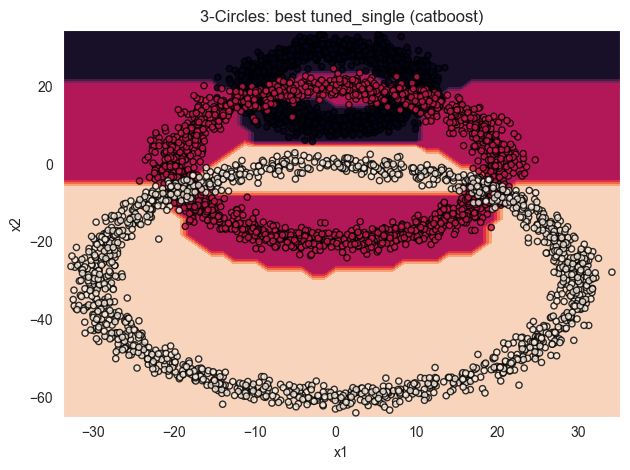

<Figure size 500x400 with 0 Axes>

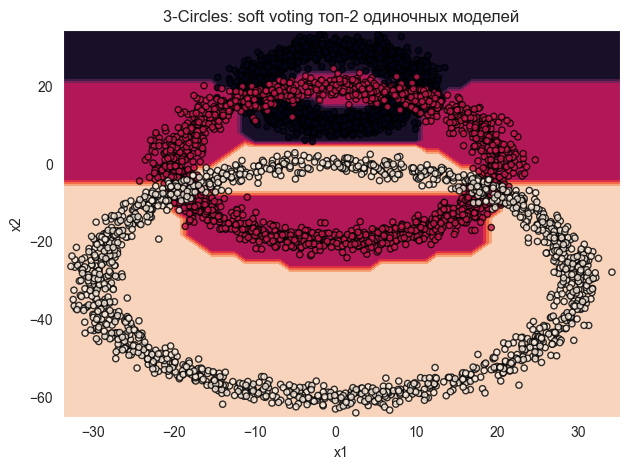

In [84]:

for dataset_name, (X_cur, y_cur) in DATASETS.items():
    print(f"\n===== Decision boundaries: датасет {dataset_name} =====")

    df_cur = (
        df_all[df_all["dataset"] == dataset_name]
        .sort_values("f1_macro", ascending=False)
    )

    # Лучшая одиночная тюнингованная модель
    df_single_best = df_cur[df_cur["type"] == "tuned_single"]
    if df_single_best.empty:
        print(f"[{dataset_name}] нет tuned_single моделей, пропускаем одиночку")
    else:
        best_single_row = df_single_best.iloc[0]
        run_single = get_run_by_id(all_best_runs, best_single_row["model_id"])
        est_single = clone(run_single["estimator"])
        est_single.fit(X_cur, y_cur)

        plot_decision_boundary(
            est_single,
            X_cur,
            y_cur,
            title=f"{dataset_name}: best tuned_single ({best_single_row['name']})",
        )

    # Простой ансамбль: soft voting из топ-2 одиночных моделей
    df_single_top2 = df_single_best.head(2)
    if len(df_single_top2) < 2:
        print(f"[{dataset_name}] меньше 2 одиночных моделей, ансамбль пропускаем")
        continue
    
    base_estimators = []
    supports_proba_flags = []
    
    for j, (_, row) in enumerate(df_single_top2.iterrows()):
        run = get_run_by_id(all_best_runs, row["model_id"])
        est = clone(run["estimator"])
        # Делаем имя уникальным, даже если base_name одинаковый
        est_name = f"{row['name']}_{j}"
        base_estimators.append((est_name, est))
        supports_proba_flags.append(run.get("supports_proba", False))
    
    # Если обе модели умеют predict_proba -> soft, иначе -> hard
    # В целом можно было по f1_macro взять веса, но так правильнее вроде как
    voting_mode = "soft" if all(supports_proba_flags) else "hard"
    
    voting_clf = VotingClassifier(
        estimators=base_estimators,
        voting=voting_mode,
    )
    
    voting_clf.fit(X_cur, y_cur)
    
    plot_decision_boundary(
        voting_clf,
        X_cur,
        y_cur,
        title=f"{dataset_name}: {voting_mode} voting топ-2 одиночных моделей",
    )

**Вопрос:** Какие результаты у вас получились? Прокомментируйте результаты работы ваших моделей 

Кратко:
Лучше всего на твоих синтетических датасетах работают деревья/лес/бустинги и kNN, линейные модели ожидаемо сливают на сильно нелинейных границах, кластеризация без учителя заметно проигрывает супервизору, а ансамбли (voting/stacking) дают небольшой прирост к лучшим бустингам или вообще просто стабилизируют результат.

Подлинбше:
- На “moons”, “circles”, “3-circles” линейные модели (логрег, LDA, линейный SVM) дают заметно меньший F1: им тяжело описать криволинейные границы. Нелинейные методы (kNN, деревья, RandomForest, HistGB, XGBoost/CatBoost) выходят в топ по качеству.
- На спиралях качество падает у всех, но относительный лидер тот же: kNN и деревья/бустинги, которые могут строить сильно изломанные границы; линейные модели там почти бесполезны.
- Кластеризационные алгоритмы (k-means, GMM и т.п.) улавливают общую геометрию, но без меток классов дают существенно худшие F1/accuracy, особенно когда классы переплетены (спирали).
- Ансамбли голосования/стейкинга из топ-моделей, как правило, либо слегка улучшают лучшую одиночную модель, либо просто сглаживают разброс, но не дают магического скачка по метрикам.